# Project 04 : Disease And Treatment

**Table of contents**<a id='toc0_'></a>         
- [1.0 Introduction](#toc1_)    
  - [1.1 Overview](#toc1_1_)    
  - [1.2 Objectives](#toc1_2_)    
- [2.0 Data Collection](#toc2_)    
  - [2.1 Data Source and Dictionary](#toc2_1_)
  - [2.2 Import Libraries](#toc2_2_)
  - [2.3 Import Data](#toc2_3_)     
- [3. Data Preprocessing](#toc3_)    
  - [3.1 Data Analysis](#toc3_1_)
  - [3.2 Data Cleansing and Transformation](#toc3_2_)
- [4.0 Exploratory Data Analysis](#toc4_)    
  - [4.1 Import DataSet](#toc4_1_)    
  - [4.2 Data Visualization](#toc4_2_)
      - [4.2.1 Mosquito species and presence of WNV](#toc4_2_1_)
      - [4.2.2 Weather effect on mosquito population and presence of WNV](#toc4_2_2_)
      - [4.2.3 Month and Year effect on mosquito population and presence of WNV](#toc4_2_3_)
      - [4.2.4 Pesticide spray effect on mosquito population and presence of WNV](#toc4_2_4_)
      - [4.2.5 Geolocation plot of mosquito population and presence of WNV](#toc4_2_5_)
- [5.0 Modeling](#toc5_)    
  - [5.1 Feature Engineering](#toc5_1_)  
  - [5.2 Model Selection and Training](#toc5_2_)
      - [5.2.1 XGB Classifier](#toc5_2_1_)
      - [5.2.2 Random Forest Classifer](#toc5_2_2_)
      - [5.2.3 AdaBoost Classifier](#toc5_2_3_)
      - [5.2.4 CatBoost Classifier](#toc5_2_4_)
      - [5.2.5 XGBoost Classifier](#toc5_2_5_)   
  - [5.3 Model Evaluation and Findings](#toc5_3_)
- [6.0 Conclusion](#toc6_)      
- [7.0 Kaggle Score](#toc7_)   

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1.0 Introduction](#toc0_)

## <a id='toc1_1_'></a>[1.1 Overview](#toc0_)
Due to the recent epidemic of West Nile Virus in the Windy City, the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city.

## <a id='toc1_2_'></a>[1.2 Objective](#toc0_)
Develop a predictive model to determine the likelihood of mosquitos testing positive for West Nile virus based on weather, location, testing, and spraying data. This model will help the City of Chicago and the Chicago Department of Public Health (CDPH) optimize pesticide deployment, improving public health and safety while managing costs.

# <a id='toc2_'></a>[2.0 Data Collection](#toc0_)

## <a id='toc2_1_'></a>[2.1 Data Source and Dictionary](#toc0_)

## Data Source

Kaggle: https://www.kaggle.com/competitions/predict-west-nile-virus/data

Research: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786

Weather factors are important drivers of WNV transmission due to their direct effect in mosquito biology. When compared with human WNV cases, higher than normal average annual temperatures are associated with an increased likelihood of higher WNV disease incidence, nationally and in most regions in the United States [17]. This relationship was true in Europe, too, where abnormally high July temperature was associated with higher incidence of human WNV cases [20]. The role of precipitation is often controversial and varies by study regions. For example, higher than normal precipitation was positively associated with higher human WNV cases in the eastern region of the United States, but this relationship was reversed for the western region [21]. Another study identified drought as an important driver of WNV epidemics in the United States [22]. Local landscape structures have also been associated with human WNV incidence. The important land cover variables associated with increased risks of human WNV include proximity to wetlands [23,24], higher tree density [24], irrigated and agricultural rural areas [25], urban areas characterized by higher impervious surfaces and storm sewer systems [26], and inner suburbs characterized by older houses, moderate vegetation and moderate population [27].

## Train Data Dictionary
| Column                 | Description                                                                           |
|------------------------|----------------------------------------------------------------------------------------|
| Date                   | Date that the WNV test is performed                                                    |
| Address                | Approximate address of the location of trap. This is used to send to the GeoCoder      |
| Species                | The species of mosquitos                                                               |
| Block                  | Block number of address                                                                |
| Street                 | Street name                                                                            |
| Trap                   | Id of the trap                                                                         |
| AddressNumberAndStreet | Approximate address returned from GeoCoder                                             |
| Latitude               | Latitude returned from GeoCoder                                                        |
| Longitude              | Longitude returned from GeoCoder                                                       |
| AddressAccuracy        | Accuracy returned from GeoCoder                                                        |
| NumMosquitos           | Number of mosquitoes caught in this trap                                               |
| WnvPresent             | Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present |

## Test Data Dictionary
| Column                 | Description                                                                           |
|------------------------|----------------------------------------------------------------------------------------|
| Id                     | The id of the record                                                                   |
| Date                   | Date that the WNV test is performed                                                    |
| Address                | Approximate address of the location of trap. This is used to send to the GeoCoder      |
| Species                | The species of mosquitos                                                               |
| Block                  | Block number of address                                                                |
| Street                 | Street name                                                                            |
| Trap                   | Id of the trap                                                                         |
| AddressNumberAndStreet | Approximate address returned from GeoCoder                                             |
| Latitude               | Latitude returned from GeoCoder                                                        |
| Longitude              | Longitude returned from GeoCoder                                                       |
| AddressAccuracy        | Accuracy returned from GeoCoder                                                        |

## Weather Data Dictionary

| Column       | Description                                                                           |
|--------------|----------------------------------------------------------------------------------------|
| Station      | The identifier of the weather station                                                  |
| Date         | The date of the observation                                                            |
| Tmax         | Maximum temperature recorded on that day                                               |
| Tmin         | Minimum temperature recorded on that day                                               |
| Tavg         | Average temperature recorded on that day                                               |
| Depart       | Departure of the average temperature from the normal temperature                       |
| DewPoint     | The dew point temperature                                                              |
| WetBulb      | The wet bulb temperature                                                               |
| Heat         | Heating degree days (a measure of demand for energy needed to heat a building)         |
| Cool         | Cooling degree days (a measure of demand for energy needed to cool a building)         |
| Sunrise      | Time of sunrise                                                                        |
| Sunset       | Time of sunset                                                                         |
| CodeSum      | A string summarizing weather conditions (e.g., fog, rain, thunder)                     |
| Depth        | Snow depth                                                                             |
| Water1       | Water equivalent of snow on the ground                                                 |
| SnowFall     | Snowfall amount                                                                        |
| PrecipTotal  | Total precipitation                                                                    |
| StnPressure  | Station pressure                                                                       |
| SeaLevel     | Sea-level pressure                                                                     |
| ResultSpeed  | Resultant wind speed                                                                   |
| ResultDir    | Resultant wind direction                                                               |
| AvgSpeed     | Average wind speed                                                                     |

### Weather Phenomena
| Code | Description                             | Code | Description                             |
|------|-----------------------------------------|------|-----------------------------------------|
| +FC  | Tornado/Waterspout                      | DS   | Duststorm                               |
| FC   | Funnel Cloud                            | PO   | Sand/Dust Whirls                        |
| TS   | Thunderstorm                            | SA   | Sand                                    |
| GR   | Hail                                    | SS   | Sandstorm                               |
| RA   | Rain                                    | PY   | Spray                                   |
| DZ   | Drizzle                                 | SQ   | Squall                                  |
| SN   | Snow                                    | DR   | Low Drifting                            |
| SG   | Snow Grains                             | SH   | Shower                                  |
| GS   | Small Hail &/or Snow Pellets            | FZ   | Freezing                                |
| PL   | Ice Pellets                             | MI   | Shallow                                 |
| IC   | Ice Crystals                            | PR   | Partial                                 |
| FG+  | Heavy Fog (FG & LE.25 Miles Visibility) | BC   | Patches                                 |
| FG   | Fog                                     | BL   | Blowing                                 |
| BR   | Mist                                    | VC   | Vicinity                                |
| UP   | Unknown Precipitation                   | -    | Light                                   |
| HZ   | Haze                                    | +    | Heavy                                   |
| FU   | Smoke                                   | No Sign | Moderate                             |
| VA   | Volcanic Ash                            | DU   | Widespread Dust                         |


** What is the measurement for PrecipTotal**<br>

Rainfall and Melted Snow:<br>
M = MISSING DATA <br>
T = TRACE<br>

"Trace" in the context of precipitation measurements typically means a very small, barely measurable amount of precipitation. Here's a more detailed explanation:

1. Definition: A trace of precipitation is an amount of rain, snow, or other form of precipitation that is less than the smallest amount that can be measured by the standard rain gauge.

2. Measurement: In the United States, this is typically less than 0.01 inches (0.25 mm) for rain or melted snow.

3. Recording: It's often denoted as "T" in weather records.

4. Significance: While a trace amount isn't enough to measure precisely, it's still recorded because it indicates that some precipitation occurred, which can be important for climate records and some specific applications.

## Spray Data Dictionary

| Column    | Description                           |
|-----------|---------------------------------------|
| Date      | The date of the spray                 |
| Time      | The time of the spray                 |
| Latitude  | The Latitude of the spray location    |
| Longitude | The Longitude of the spray location   |

## <a id='toc2_2_'></a> [2.2 Import Libraries](#toc0_)

Import libraries from helper_functions script

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.neighbors import NearestNeighbors
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import shap
from catboost import CatBoostClassifier
import joblib
from sklearn.cluster import DBSCAN

# warnings
import warnings
warnings.filterwarnings("ignore")

## <a id='toc2_3_'></a> [2.3 Import Data](#toc0_)


In [2]:
# Load the dataset using the correct relative path
df_train = pd.read_csv(r'datasets\input\train.csv')
df_weather = pd.read_csv(r'datasets\input\weather.csv')
df_spray = pd.read_csv(r'datasets\input\spray.csv')
df_test = pd.read_csv(r'datasets\input\test.csv')

# Load additional dataset on West nile virus Human disease case
wnv_yearly_case = pd.read_csv(r'datasets\input\Wnv human disease cases by year of illness onset 1999-2023.csv')
wnv_monthly_case = pd.read_csv(r'datasets\input\Wnv human disease cases by month of illness onset from year.csv')
wnv_by_country = pd.read_csv(r'datasets\input\Wnv human neuroinvasive disease average annual incidence per 100000 population by county of residence 1999-2023.csv')


# <a id='toc3_'></a> [3.0 Data Preprocessing](#toc0_)

## <a id='toc3_1_'></a> [3.1 Data Analysis](#toc0_)

1. Check data info for missing values, shape, column names and dtypes

In [3]:
# create a dict for the list of df
df_list = {'df train': df_train, 
       'df weather': df_weather, 
       'df spray': df_spray, 
       'df test': df_test}

In [4]:
# Check out what are the missing value in all the df
for df_name, df in df_list.items():
    nullz = df.isna().sum().sum()
    m = (df == 'M').sum().sum()
    t = (df == ' T').sum().sum()
    tt = (df == '  T').sum().sum()
    
    print(f"{df_name}")
    print(f"\tNumber of NaN: {nullz}")
    print(f"\tNumber of 'M': {m}")
    print(f"\tNumber of ' T': {t}")
    print(f"\tNumber of '  T': {tt}")
    print(df.info())
    print('\n')

df train
	Number of NaN: 0
	Number of 'M': 0
	Number of ' T': 0
	Number of '  T': 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB
N

## <a id='toc3_2_'></a> [3.2 Data Cleansing and Transformation](#toc0_)

## Weather data cleansing and transformation

1. Convert Date in to DateTime
2. Create a month column
3. Impute and fill missing values with median
4. Drop unused columns that do no provide meaningful data
5. Manually OneHotEncode categorical data (CodeSum)
6. Convert Fahrenheit to Celsius, and Precipitation Inches to mm

In [5]:
# Converting the weather df to datetime
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather['Month'] = df_weather['Date'].dt.month

In [6]:
# Columns to fill with monthly median
columns_to_fill = ['Heat', 'Cool', 'PrecipTotal', 'Tavg', 'WetBulb', 'StnPressure', 'AvgSpeed', 'SeaLevel']

In [7]:
from helper_functions import fill_with_monthly_median

# Fill missing values in specified columns with monthly median
for column in columns_to_fill:
    df_weather = fill_with_monthly_median(df_weather, column)

In [8]:
# Drop unused columns
cols_to_drop = ['Water1', 'Depart', 'SnowFall', 'Depth']
df_weather.drop(columns=cols_to_drop, inplace=True)

In [9]:
# One hot encoding for Codesum
df_weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

Quite a number of CodeSums and also rows with multiple weather conditions. We will replace ' ' with MD for the "moderate weather", and assign each CodeSum with a number and for rows with multiple codesums, the result will be the sum of the base weather condition.

In [10]:
df_weather['CodeSum'] = df_weather['CodeSum'].replace(' ','MD')

In [11]:
from helper_functions import recode_codesum

# Extract unique codes from the CodeSum column
unique_codes = set()
for codes in df_weather['CodeSum']:
    for code in codes.split():
        unique_codes.add(code)

# Create a mapping from each CodeSum value to a unique numerical identifier
codesum_to_id = {code: i + 1 for i, code in enumerate(unique_codes)}

# Apply the function to the CodeSum column
df_weather['CodeSum_Recode'] = df_weather['CodeSum'].map(lambda x: recode_codesum(x,codesum_to_id))

In [12]:
# convert precipitation from inches to mm. 1 inch = 25.4mm
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].map(lambda x: x * 25.4)

# convert temperature from fahrenheit to degress celsius. C = (F-32)*5/9
temp = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb']

# convert from temperature from fahrenheit to celsius
for t in temp:
    df_weather[t] = df_weather[t].map(lambda x: round((x-32)*5/9,1))

## Spray data cleansing and transformation

1. Convert Date in to DateTime
2. Drop unused columns that do no provide meaningful data
3. Add Spray Count column

In [13]:
# Convert the Data to python datetime series
df_spray['Date']= pd.to_datetime(df_spray['Date'])

In [14]:
# Drop the time columns
df_spray = df_spray.drop(columns=['Time'])

In [15]:
# Add a new column 'spray_count' with all values set to 1
df_spray['spray_count'] = 1

In [16]:
# check data
print(df_spray.info())
df_spray.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         14835 non-null  datetime64[ns]
 1   Latitude     14835 non-null  float64       
 2   Longitude    14835 non-null  float64       
 3   spray_count  14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 463.7 KB
None


Date   Latitude  Longitude  spray_count
0 2011-08-29  42.391623 -88.089163            1
1 2011-08-29  42.391348 -88.089163            1
2 2011-08-29  42.391022 -88.089157            1

## Train and test data cleansing and transformation

1. Convert Date in to DateTime
2. Check for null values

In [17]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [18]:
# check for null values
df_spray.isnull().sum()

Date           0
Latitude       0
Longitude      0
spray_count    0
dtype: int64

### Checkpoint: Create a copy of df for EDA

In [19]:
train_cleaned_df = df_train.copy()
test_cleaned_df = df_test.copy()
weather_cleaned_df = df_weather.copy()
spray_cleaned_df = df_spray.copy()

# <a id='toc4_'></a>  [4.0 Exploratory Data Analysis](#toc0_)

## <a id='toc4_1_'></a> [4.1 Import Dataset](#toc0_)

In [20]:
def convert_to_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])

In [21]:
convert_to_datetime(train_cleaned_df)
convert_to_datetime(weather_cleaned_df)
convert_to_datetime(spray_cleaned_df)

In [22]:
spray = spray_cleaned_df.copy()
train = train_cleaned_df.copy()
weather_merge = weather_cleaned_df.copy()

**Weather & Station Data**

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. 

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level

Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [23]:
# Classify each location in Train data using Nearest Neighbor approach labeling nearer to Station 1 or 2.
# Coordinates of the weather stations
station1 = np.array([41.995, -87.933])
station2 = np.array([41.786, -87.752])

# Function to calculate the distance between two points (Euclidean distance)
def calculate_distance(coord1, coord2):
    return np.linalg.norm(coord1 - coord2)  # Euclidean distance for simplicity

# Classify each location based on the nearest station
def classify_location(lat, lon):
    location = np.array([lat, lon])
    distance_to_station1 = calculate_distance(location, station1)
    distance_to_station2 = calculate_distance(location, station2)
    return 1 if distance_to_station1 < distance_to_station2 else 2

# Apply classification to each row in the dataset
train['Station'] = train.apply(lambda row: classify_location(row['Latitude'], row['Longitude']), axis=1)

# Display only the 'Latitude', 'Longitude', and 'Station' columns
result = train[['Latitude', 'Longitude', 'Station']]

# Output the classification results
print(result)

        Latitude  Longitude  Station
0      41.954690 -87.800991        1
1      41.954690 -87.800991        1
2      41.994991 -87.769279        1
3      41.974089 -87.824812        1
4      41.974089 -87.824812        1
...          ...        ...      ...
10501  41.763733 -87.742302        2
10502  41.987280 -87.666066        2
10503  41.912563 -87.668055        2
10504  42.009876 -87.807277        1
10505  41.776428 -87.627096        2

[10506 rows x 3 columns]


### Merge Train and weather df

In [24]:
# Merge the dataframes on 'Date_format' and 'Station'
train_withweather = pd.merge(train, weather_merge, on=['Date', 'Station'])

# Display new dataframe info
train_withweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
 12  Station                 10506 non-null  int64 

## <a id='toc4_2_'></a> [4.2 Data Visualization](#toc0_)

## Number of Human Infection of West Nile Virus cases by Yearly (1999-2023) for the Whole U.S

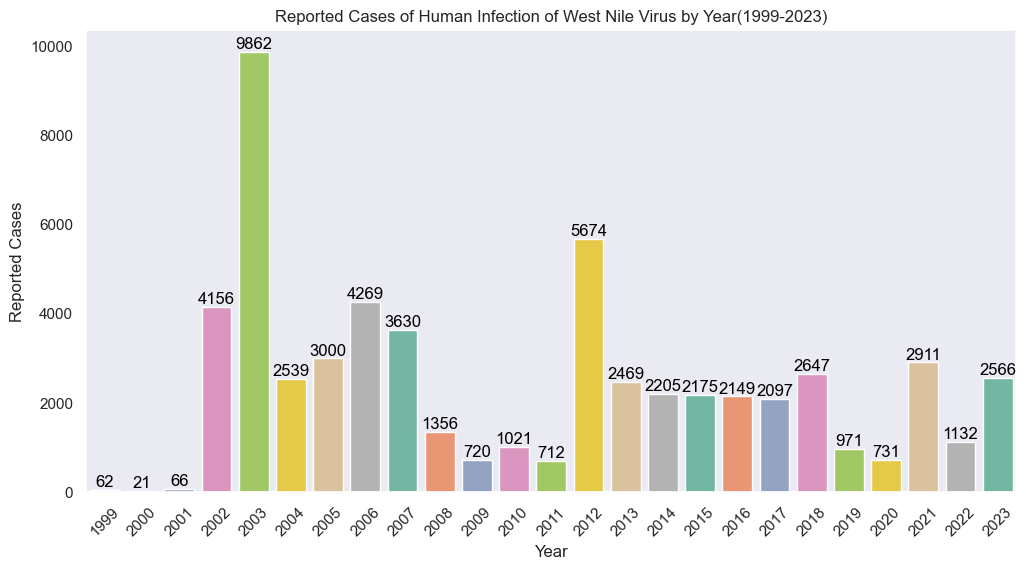

In [25]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Reported Cases', data=wnv_yearly_case, palette='Set2')

plt.title('Reported Cases of Human Infection of West Nile Virus by Year(1999-2023)')
plt.xlabel('Year')
plt.ylabel('Reported Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value annotations on top of the bars
for index, row in wnv_yearly_case.iterrows():
    ax.text(index, row['Reported Cases'], row['Reported Cases'], color='black', ha="center", va="bottom")

plt.show()

## Number of Human Infection of West Nile Virus cases by monthly (1999-2023) for the Whole U.S

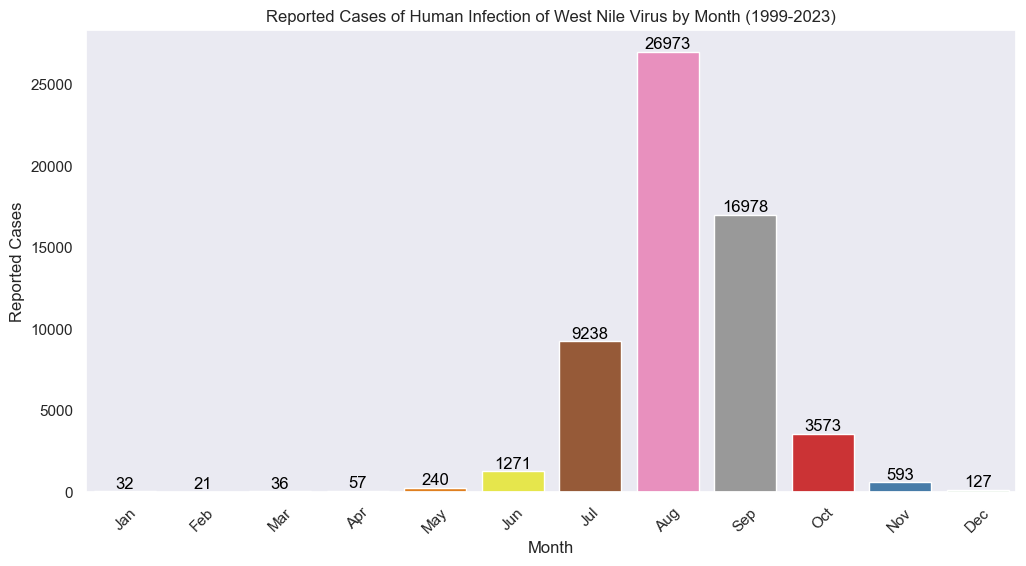

In [26]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month', y='Reported Cases', data=wnv_monthly_case, palette='Set1')

plt.title('Reported Cases of Human Infection of West Nile Virus by Month (1999-2023)')
plt.xlabel('Month')
plt.ylabel('Reported Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value annotations on top of the bars
for index, row in wnv_monthly_case.iterrows():
    ax.text(index, row['Reported Cases'], row['Reported Cases'], color='black', ha="center", va="bottom")

plt.show()

## Top 5 Counties in Illinois by Population with West Nile Virus Incidence

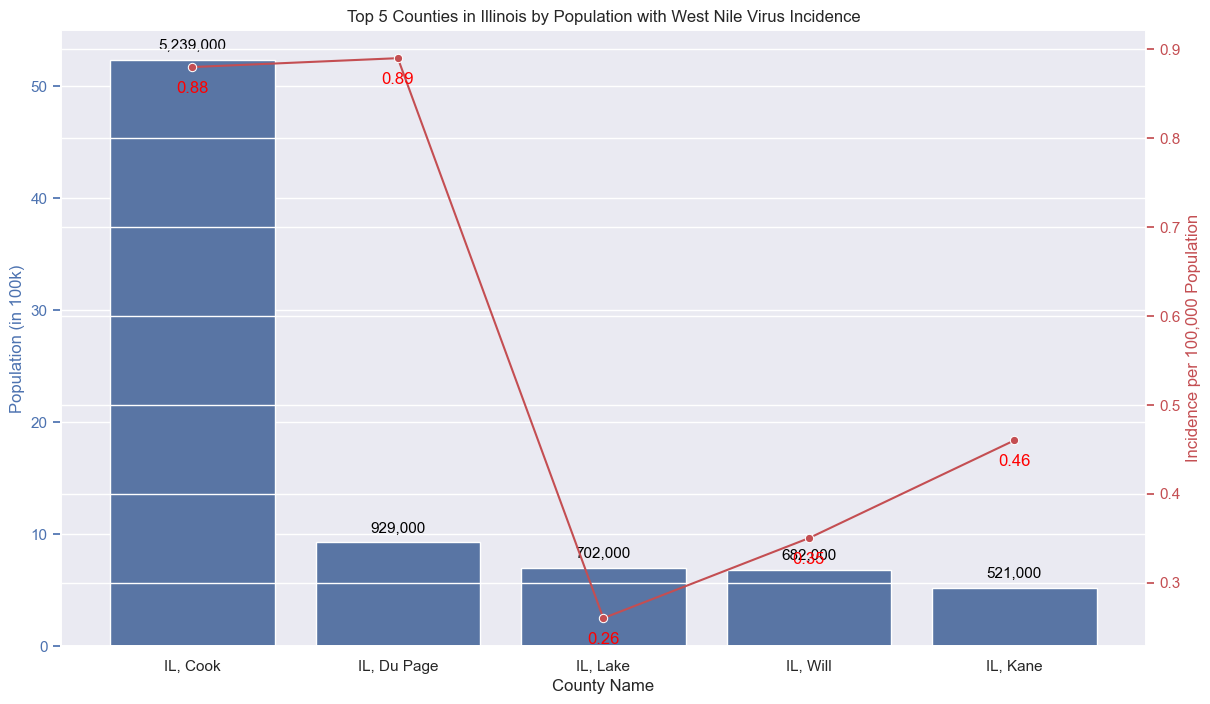

In [27]:
# Ensure the County column is string type for consistent merging and filtering
wnv_by_country['County'] = wnv_by_country['County'].astype(str)

# Filter data for Illinois (FIPS code prefix 17)
illinois_data = wnv_by_country[wnv_by_country['County'].str.startswith('17')]

# Sort by Population and get the top 5
top5_illinois = illinois_data.sort_values(by='Population', ascending=False).head(5)

# Rename the FullGeoName column to County Name
top5_illinois = top5_illinois.rename(columns={'FullGeoName': 'County Name'})

# Plotting Population and Incidence
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a bar plot for Population
sns.barplot(x='County Name', y='Population', data=top5_illinois, ax=ax1, color='b')
ax1.set_ylabel('Population (in 100k)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_yticklabels([f'{int(x/100000)}' for x in ax1.get_yticks()])  # Adjust y-axis labels to be in 100k

# Annotate the bar plot with rounded population numbers
for p in ax1.patches:
    rounded_population = int(round(p.get_height(), -3))  # Round to the nearest thousand and convert to integer
    ax1.annotate(f'{rounded_population:,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

# Create a second y-axis to plot Incidence
ax2 = ax1.twinx()
sns.lineplot(x='County Name', y='Incidence', data=top5_illinois, ax=ax2, marker='o', color='r')
ax2.set_ylabel('Incidence per 100,000 Population', color='r')
ax2.tick_params('y', colors='r')

# Annotate the line plot with incidence values
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax2.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, -15), textcoords='offset points', ha='center', va='center', color='red')

plt.title('Top 5 Counties in Illinois by Population with West Nile Virus Incidence')
plt.xlabel('County Name')

plt.xticks(rotation=45)
plt.show()

## <a id='toc4_2_1_'></a> [4.2.1 Mosquito species and presence of WNV](#toc0_)



**1. What is total number of Mosquito per month through the years?**

In [28]:
# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

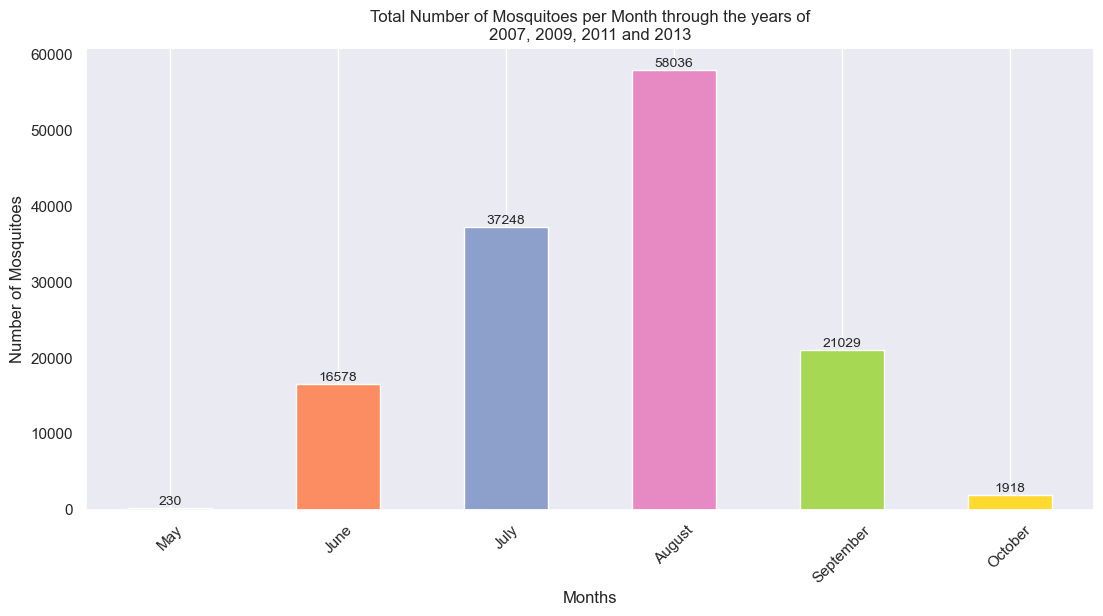

In [29]:
# Group by month and sum the number of mosquitoes across all years
total_mosquitos_per_month = train_withweather.groupby(train_withweather['Date'].dt.month)['NumMosquitos'].sum()

# Mapping month numbers to month names for x-axis labels
total_mosquitos_per_month.index = total_mosquitos_per_month.index.map(month_names)

# Plot the total number of mosquitoes in each month throughout all the years
plt.figure(figsize=(13, 6))

# Use Seaborn to set the color palette
sns.set_palette("Set1")

# Create the bar plot
ax = total_mosquitos_per_month.plot(kind='bar', color=sns.color_palette("Set2"))

plt.title('Total Number of Mosquitoes per Month through the years of\n2007, 2009, 2011 and 2013')
plt.xlabel('Months')
plt.ylabel('Number of Mosquitoes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add the value annotations on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()

**2. What is total Number of West Nile Virus Present through the years?**

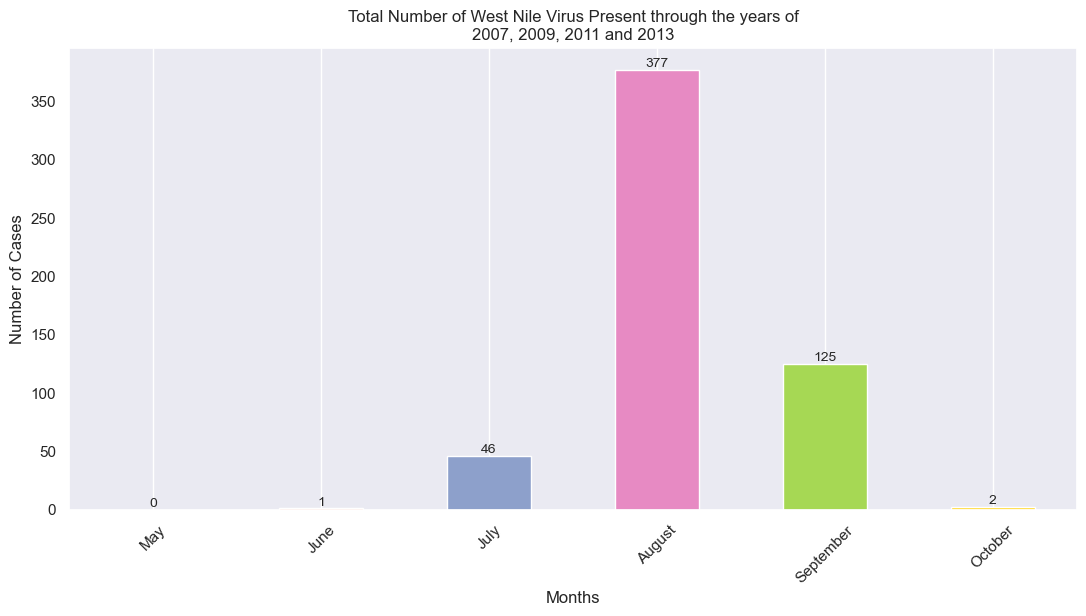

In [30]:
# Group by month and sum the number of WnvPresent across all years
total_wnv_per_month = train_withweather.groupby(train_withweather['Date'].dt.month)['WnvPresent'].sum()

# Mapping month numbers to month names for x-axis labels
total_wnv_per_month.index = total_wnv_per_month.index.map(month_names)

# Plot the total number of West Nile Virus present in each month throughout all the years
plt.figure(figsize=(13, 6))

# Use Seaborn to set the color palette
sns.set_palette("Set1")

# Create the bar plot
ax = total_wnv_per_month.plot(kind='bar', color=sns.color_palette("Set2"))

# Plot the total number of West Nile Virus present in each month throughout all the years
plt.title('Total Number of West Nile Virus Present through the years of\n2007, 2009, 2011 and 2013')
plt.xlabel('Months')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add the value annotations on top of the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

**3. Which Species of Mosquito Carries Highest WNV?**

In [31]:
# copy the df to a new df so not to overwrite the original
df = train_withweather.copy()

# Step 1: Replace '/' with ',' to keep them in the same cell
df['Species'] = df['Species'].str.replace('/', ',')

# Step 2: Split the species into lists
df['Species'] = df['Species'].str.split(',')

# Step 3: Explode the lists into separate rows
df_exploded = df.explode('Species')

# Step 4: Rename 'RESTUANS' to 'CULEX RESTUANS'
df_exploded['Species'] = df_exploded['Species'].replace('RESTUANS', 'CULEX RESTUANS')

# Now you can count the number of different species
species_counts = df_exploded['Species'].value_counts()

# Step 6: Get the top 4 species counts
top_species = species_counts.head(4).index

# Filter the DataFrame to include only the top 4 species
top_species_df = df_exploded[df_exploded['Species'].isin(top_species)]

# Group by Species and sum the number of mosquitoes and the number of WnvPresent
top_species_counts = top_species_df.groupby('Species')[['NumMosquitos', 'WnvPresent']].sum().reset_index()

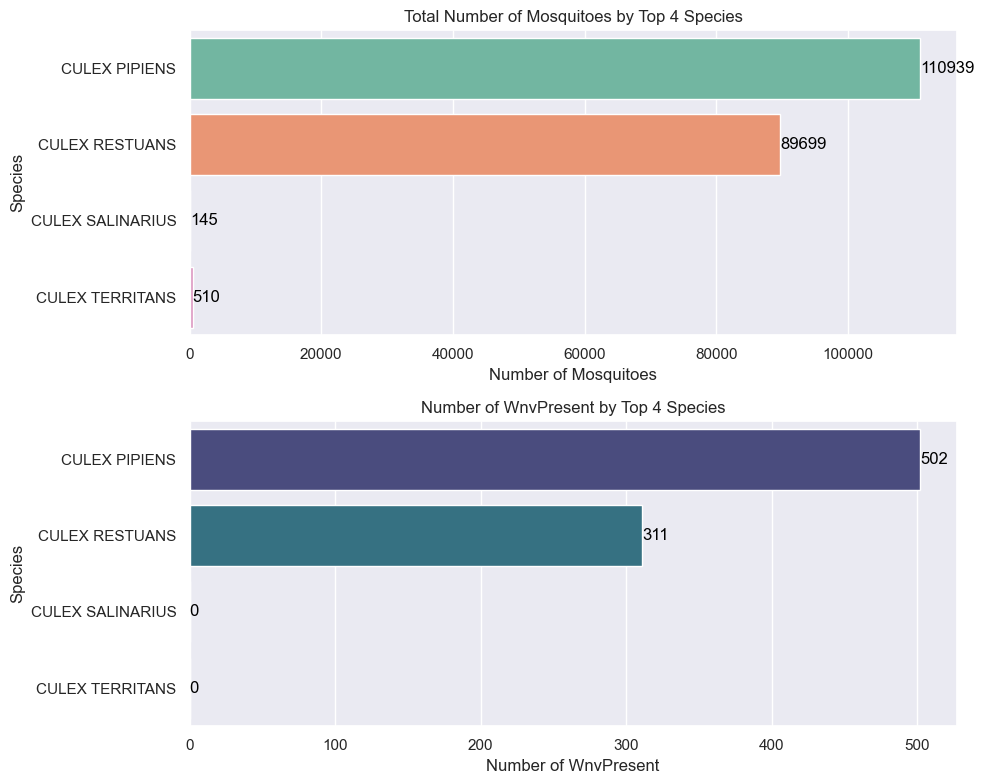

In [32]:
# Creating subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotting the total number of mosquitoes by species
sns.barplot(x='NumMosquitos', y='Species', data=top_species_counts, palette='Set2', ax=axes[0])
axes[0].set_title('Total Number of Mosquitoes by Top 4 Species')
axes[0].set_xlabel('Number of Mosquitoes')
axes[0].set_ylabel('Species')

# Adding numeric value labels to the bars
for index, value in enumerate(top_species_counts['NumMosquitos']):
    axes[0].text(value, index, f'{value}', color='black', ha="left", va="center")

# Plotting the number of WnvPresent by species
sns.barplot(x='WnvPresent', y='Species', data=top_species_counts, palette='viridis', ax=axes[1])
axes[1].set_title('Number of WnvPresent by Top 4 Species')
axes[1].set_xlabel('Number of WnvPresent')
axes[1].set_ylabel('Species')

# Adding numeric value labels to the bars
for index, value in enumerate(top_species_counts['WnvPresent']):
    axes[1].text(value, index, f'{value}', color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

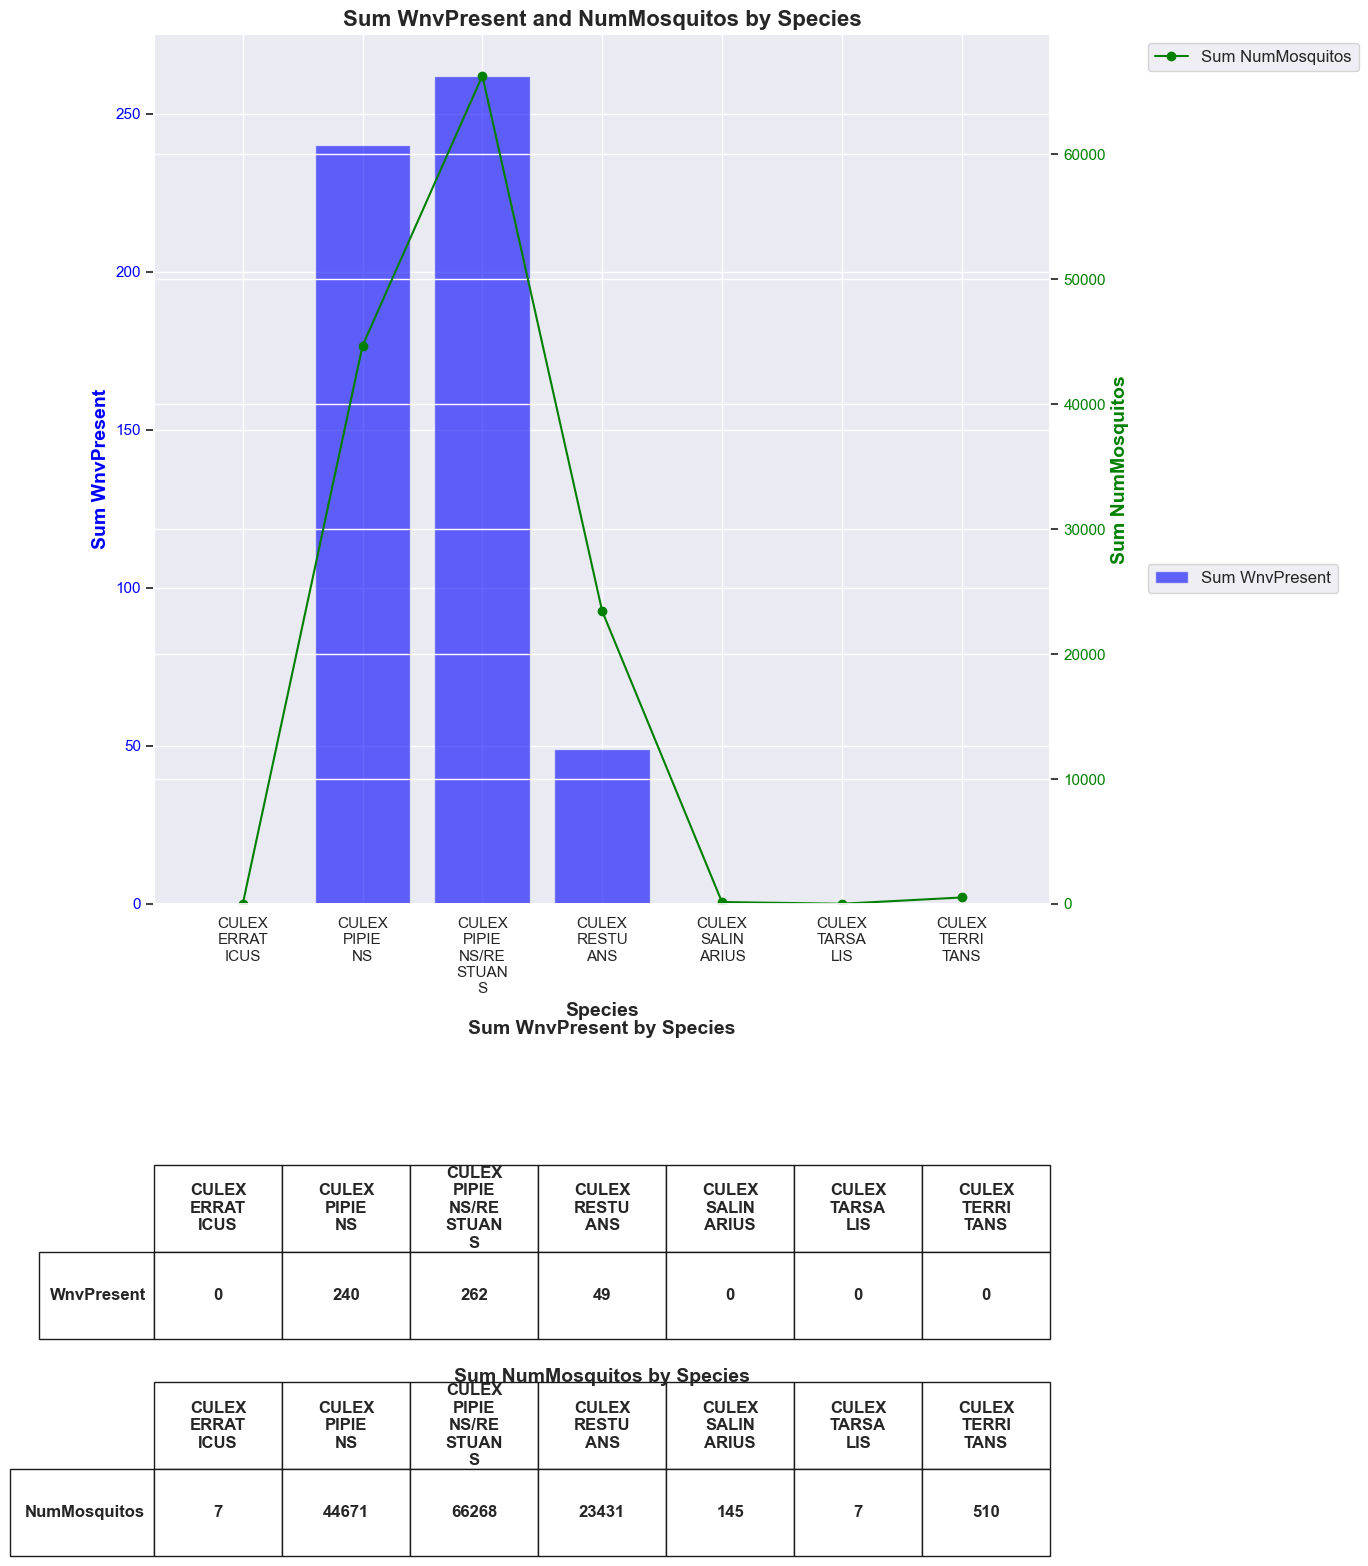

In [33]:
from helper_functions import plot_features_by_group

group_col = 'Species'
feature_1 = 'WnvPresent'
feature_2 = 'NumMosquitos'

# Plot features by the specified grouping column
plot_features_by_group(train_withweather, group_col, feature_1, feature_2, y2_limit=(0, None), agg_func='sum', color_1='blue', color_2='green')

**Observation: Species Cules Pipiens and Culex Restuans are the main Species causing WNV**

## <a id='toc4_2_2_'></a> [4.2.2 Weather effect on mosquito population and presence of WNV](#toc0_)

**2. What type of weather condition typically has the highest Mosquitoes and WNV?**

In [34]:
correlation_df = train_withweather.copy()

correlation_df['Year'] = correlation_df['Date'].dt.year

month_df = correlation_df.groupby(['Month'], as_index=False).agg({
                                                                'NumMosquitos': 'sum', 
                                                                'WnvPresent': 'sum', 
                                                                'Tavg': 'mean',
                                                                'WetBulb':'mean', 
                                                                'PrecipTotal':'mean',
                                                                'AvgSpeed': 'mean'
                                                                })


year_df = correlation_df.groupby(['Year'], as_index=False).agg({
                                                                'NumMosquitos': 'sum', 
                                                                'WnvPresent': 'sum', 
                                                                'Tavg': 'mean',
                                                                'WetBulb':'mean', 
                                                                'PrecipTotal':'mean',
                                                                'AvgSpeed': 'mean'
                                                                })


In [35]:
# correlation between West Nile Virus and climate factors
month_corr_matrix_wnv = month_df.loc[:,['WnvPresent', 'NumMosquitos','Tavg', 'WetBulb', 'PrecipTotal','AvgSpeed']].corr().round(2)

month_corr_matrix_wnv

WnvPresent  NumMosquitos  Tavg  WetBulb  PrecipTotal  AvgSpeed
WnvPresent          1.00          0.85  0.69     0.75         0.16     -0.77
NumMosquitos        0.85          1.00  0.96     0.99         0.41     -0.44
Tavg                0.69          0.96  1.00     0.99         0.40     -0.21
WetBulb             0.75          0.99  0.99     1.00         0.45     -0.31
PrecipTotal         0.16          0.41  0.40     0.45         1.00     -0.12
AvgSpeed           -0.77         -0.44 -0.21    -0.31        -0.12      1.00

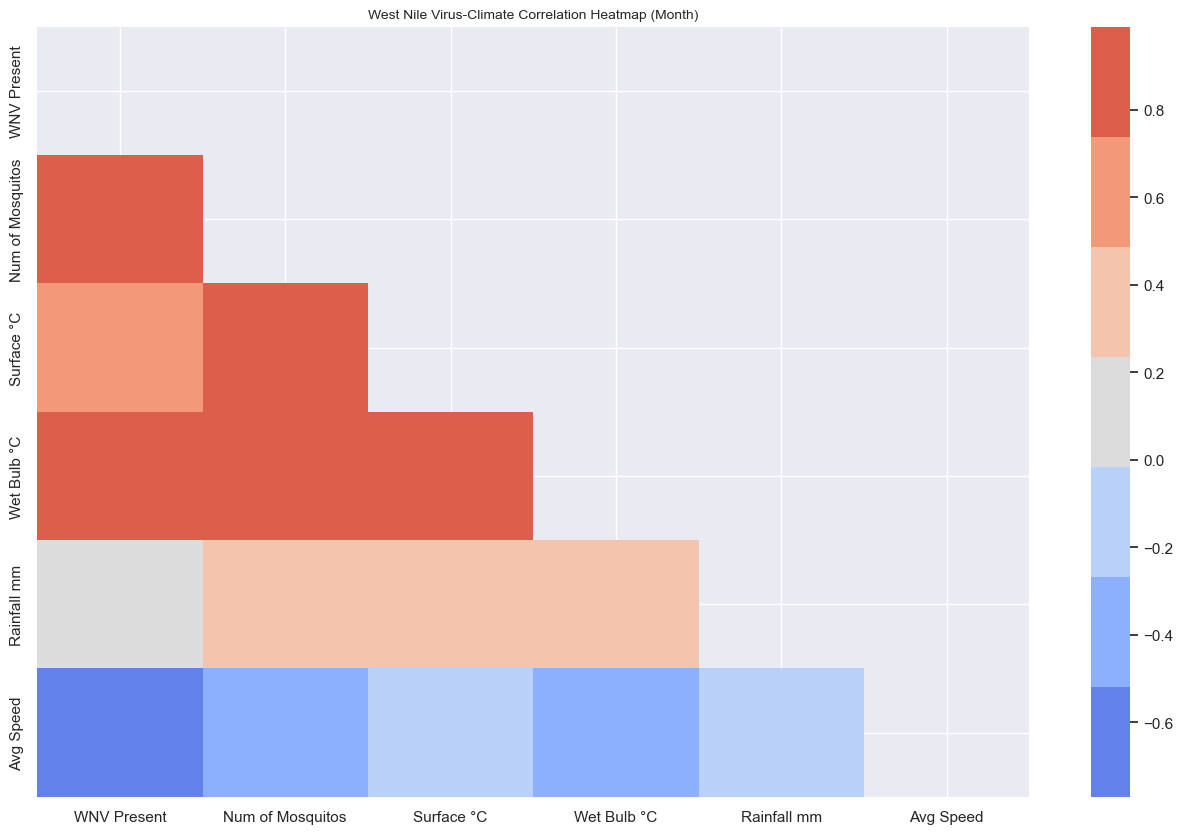

In [36]:
# correlation heatmap

plt.figure(figsize=(16,10))

# coolwarm palette shows positve and negative correlation better. Set gradient 7 for better contrast.
colormap = sns.color_palette('coolwarm',7) 

# mask upper triangle of the corr matrix
matrix = np.triu(month_corr_matrix_wnv)

ax = sns.heatmap(month_corr_matrix_wnv, mask=matrix, cmap=colormap)

labels = ['WNV Present', 'Num of Mosquitos', 'Surface °C','Wet Bulb °C', 'Rainfall mm', 'Avg Speed']

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('West Nile Virus-Climate Correlation Heatmap (Month)', fontsize = 10)

plt.show()

<Figure size 800x400 with 0 Axes>

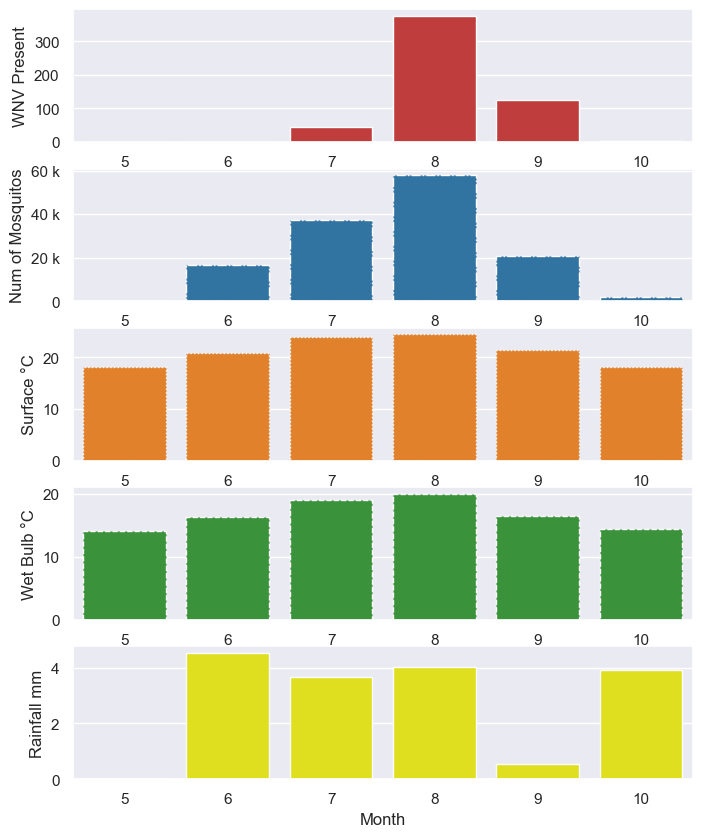

In [37]:
plt.figure(figsize=(8,4))

# subplot with 4 rows and 1 column
fig, axes = plt.subplots(nrows = 5,ncols = 1, figsize = (8,10))

# setting the different column data and color, linestyle, y-axis rename
y_columns = ['WnvPresent', 'NumMosquitos', 'Tavg','WetBulb', 'PrecipTotal']
linestyle = ['-', '-.', ':', '--', '-']
color = ["#d62728", "#1f77b4", "#ff7f0e", "#2ca02c", "#FFFF00"]
column_names = ['WNV Present', 'Num of Mosquitos', 'Surface °C','Wet Bulb °C', 'Rainfall mm']
# Months = ['May', 'June', 'July', 'August', 'September', 'October' ]


# looping through same df but different columns and plot subplots along the same x-axis, differentiating each plot by colour and linestyle
for ax, names, lines, color, column_names in zip(axes, y_columns, linestyle, color, column_names):
    ax_plot = sns.barplot(data = month_df, x = 'Month' , y = names, order=None, errorbar=None , color = color, linestyle = lines, ax=ax)
    ax_plot.set(ylabel = column_names)
    ax_plot.set(xlabel='Month')

    ## format y axis in engineering notation.
    ax_plot.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

<Figure size 800x400 with 0 Axes>

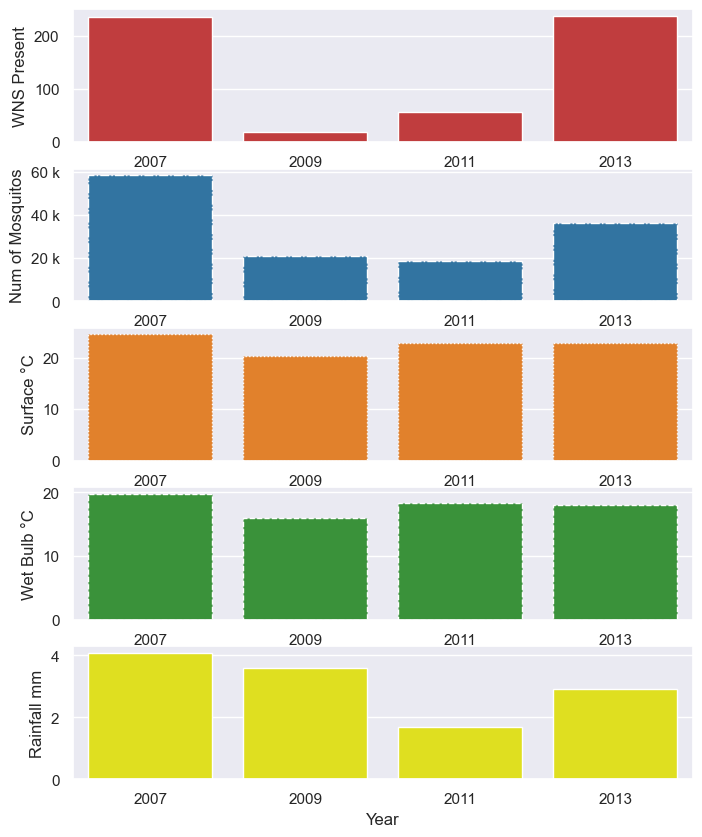

In [38]:
plt.figure(figsize=(8,4))

# subplot other climate graphs
fig, axes = plt.subplots(nrows = 5,ncols = 1, figsize = (8,10))

# setting the different column data and color, linestyle, y-axis rename
y_columns = ['WnvPresent', 'NumMosquitos', 'Tavg','WetBulb', 'PrecipTotal']
linestyle = ['-', '-.', ':', '--', '-']
color = ["#d62728", "#1f77b4", "#ff7f0e", "#2ca02c", "#FFFF00"]
column_names = ['WNS Present', 'Num of Mosquitos', 'Surface °C','Wet Bulb °C', 'Rainfall mm']


# looping through same df but different columns and plot subplots along the same x-axis, differentiating each plot by colour and linestyle
for ax, names, lines, color, column_names in zip(axes, y_columns, linestyle, color, column_names):
    ax_plot = sns.barplot(data = year_df, x = 'Year' , y = names, errorbar=None , color = color, linestyle = lines, ax=ax)
    ax_plot.set(ylabel = column_names)
    ax_plot.set(xlabel='Year')

    
    ## format y axis in engineering notation.
    ax_plot.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

In [39]:
# Display unique values in 'CodeSum' from the actual dataset
unique_codes = train_withweather['CodeSum'].unique()
print(unique_codes)

['BR HZ' 'RA BR' 'TSRA BR HZ VCTS' 'MD' 'TSRA RA BR VCTS'
 'TS TSRA RA BR HZ VCTS' 'DZ BR' 'RA BR HZ' 'HZ' 'VCTS' 'TSRA RA DZ BR HZ'
 'TSRA BR HZ' 'TSRA RA BR' 'TS TSRA RA BR' 'BR' 'TSRA RA' 'TSRA HZ' 'TSRA'
 'RA' 'TS TSRA BR' 'RA DZ BR' 'TS TSRA BR HZ' 'TS TSRA RA VCTS' 'TSRA BR'
 'TS BR' 'TS' 'FG BR HZ' 'TS TSRA RA FG BR HZ']


'BCFG' 'MIFG','MIFG','TSRA','VCFG' is few code are remove from the list below as they arent in the weather_DF. MOD is rename to MD

In [40]:
# Split the 'CodeSum' column into multiple binary columns
weather_dummies = train_withweather['CodeSum'].str.get_dummies(sep=' ')

# Concatenate the original DataFrame with the new binary columns
expanded_df = pd.concat([train_withweather[['NumMosquitos', 'WnvPresent']], weather_dummies], axis=1)

# Melt the dataframe to create 'WeatherCondition'
melted = expanded_df.melt(id_vars=['NumMosquitos', 'WnvPresent'], 
                          var_name='WeatherCondition', value_name='Value')

# Filter out rows where 'Value' is 0
melted = melted[melted['Value'] != 0]

# Group by 'WeatherCondition' and aggregate the sums of 'NumMosquitos' and 'WnvPresent'
weathercond_NumMosWnv = melted.groupby('WeatherCondition').agg({'NumMosquitos': 'sum', 'WnvPresent': 'sum'}).reset_index().sort_values(by='NumMosquitos', ascending=False)

# Display the new dataframe
weathercond_NumMosWnv.head(7)

WeatherCondition  NumMosquitos  WnvPresent
4               MD         74083         255
0               BR         38848         218
5               RA         36496         172
7             TSRA         27200         115
3               HZ         16007          78
6               TS         11697          55
1               DZ          4889           8

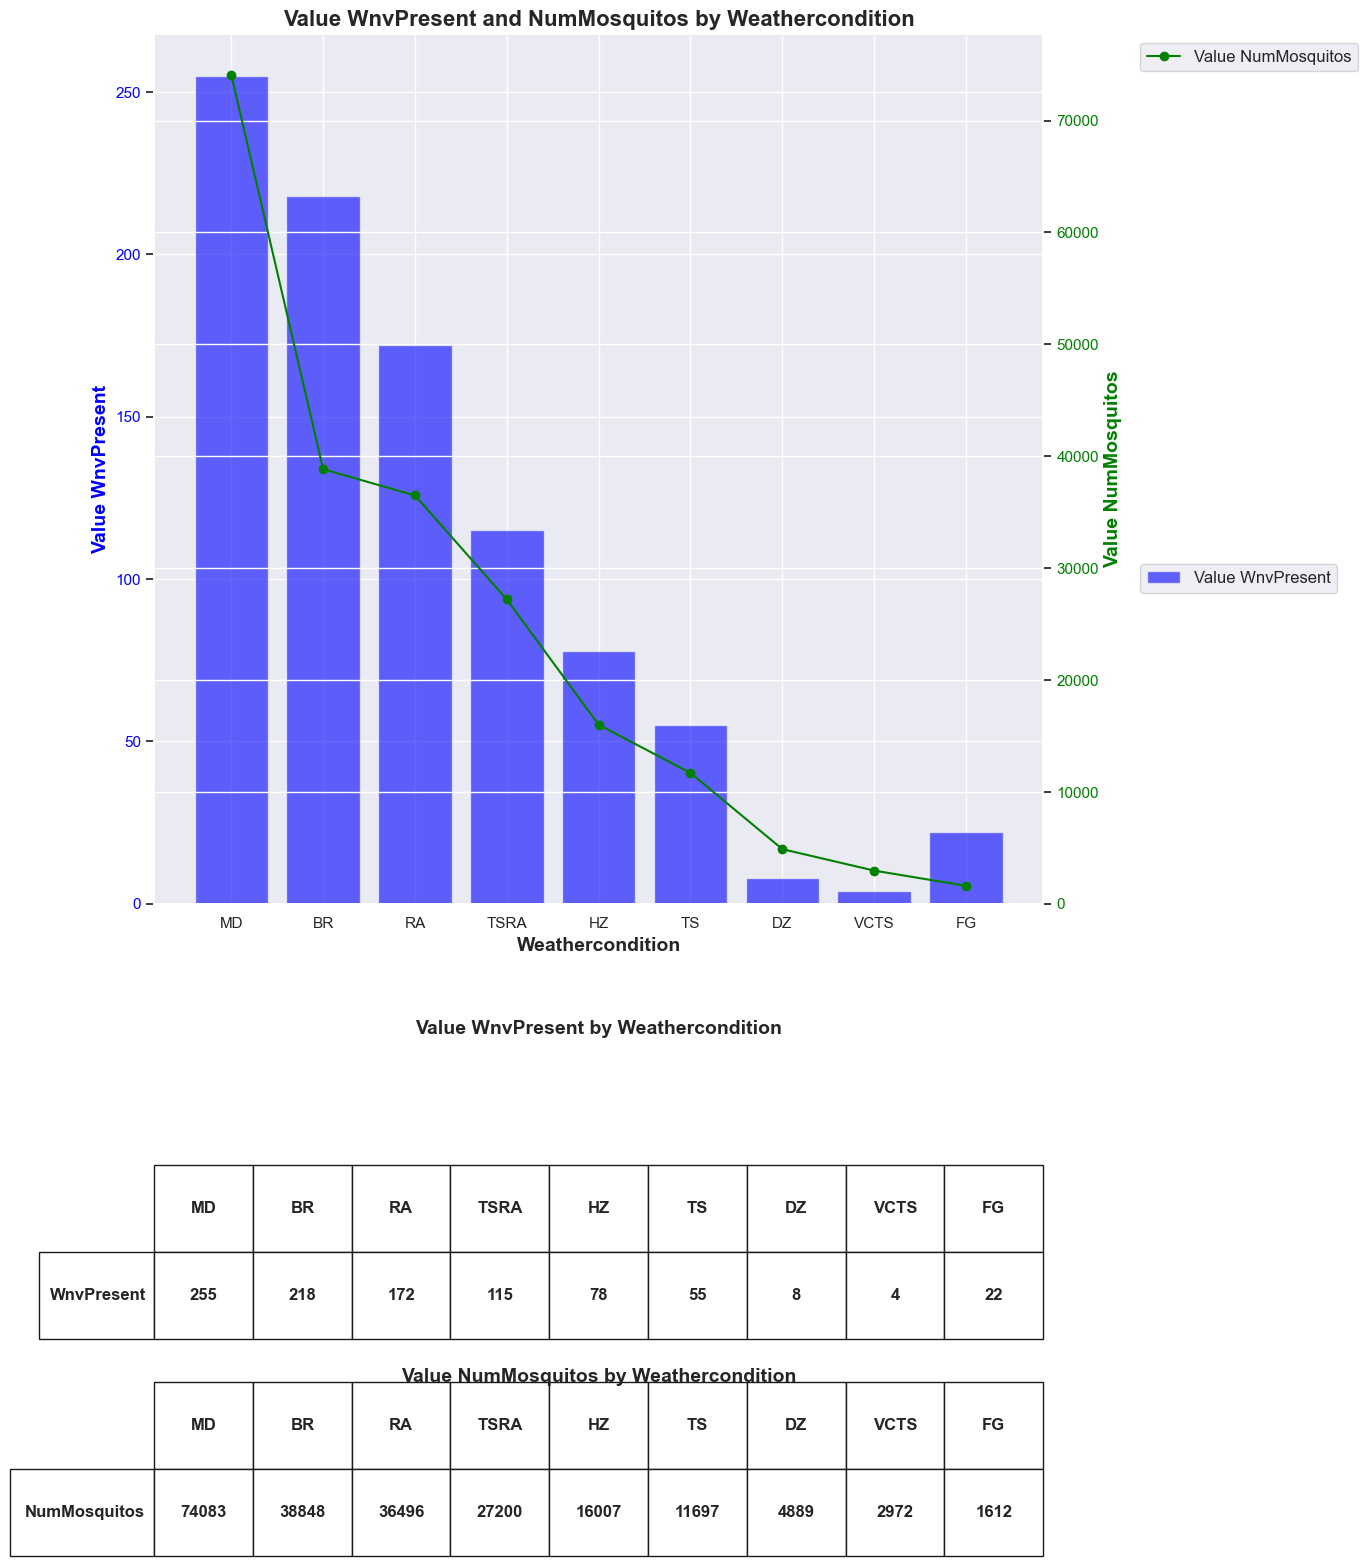

In [41]:
group_col = 'WeatherCondition'
feature_1 = 'WnvPresent'
feature_2 = 'NumMosquitos'

# Plot features by the specified grouping column
plot_features_by_group(weathercond_NumMosWnv, group_col, feature_1, feature_2, y2_limit=(0, None), agg_func='value', color_1='blue', color_2='green')

**Observation: WNV present Highest under these Weather Conditions:**
<br>MD 255> BR 218 > RA 172 > TSRA 115 > HZ 78 > TS 55
<br>From Data Dictionary:
- MD: Moderate
- BR: Mist
- RA: Rain
- TSRA: Thunderstorm Rain
- HZ: Haze
- TS: Thunderstorm

## <a id='toc4_2_3_'></a> [4.2.3 Month and Year effect on mosquito population and presence of WNV](#toc0_)


**3. When? Which period of the year typically has the highest Mosquitoes and WNV?**

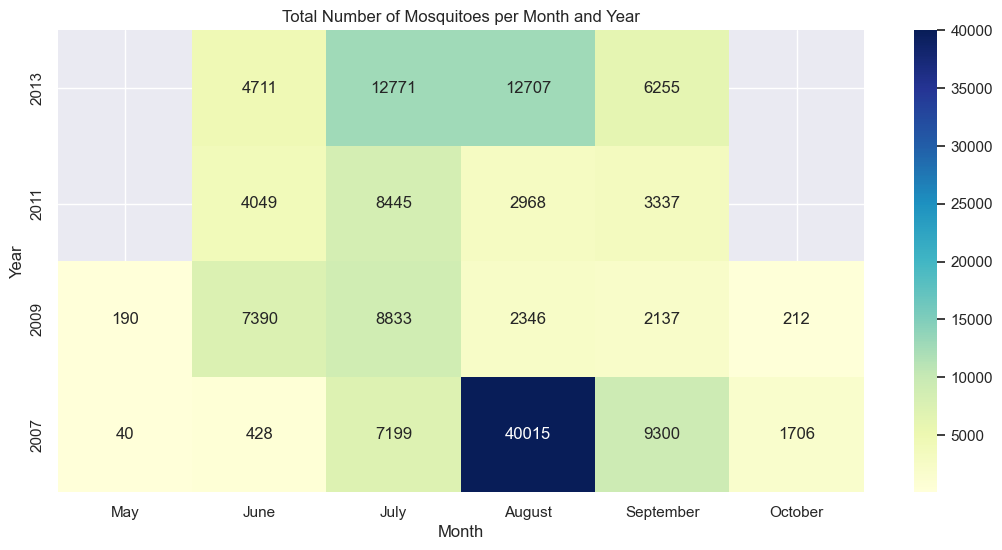

In [42]:
# Extract month and year from the Date column
train_withweather['Year'] = train_withweather['Date'].dt.year
train_withweather['Month'] = train_withweather['Date'].dt.month

# Group by year and month, then sum the number of mosquitoes
monthly_mosquitoes = train_withweather.groupby(['Year', 'Month'])['NumMosquitos'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
monthly_mosquitoes_pivot = monthly_mosquitoes.pivot(index='Month', columns='Year', values='NumMosquitos')

# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_mosquitoes_pivot.index = monthly_mosquitoes_pivot.index.map(month_names)

# Pivot the table to have months as columns and years as rows
monthly_mosquitoes_pivot = monthly_mosquitoes.pivot(index='Year', columns='Month', values='NumMosquitos')

# Mapping month numbers to month names for column labels
monthly_mosquitoes_pivot.columns = monthly_mosquitoes_pivot.columns.map(month_names)

# Sorting the index (years) in descending order
monthly_mosquitoes_pivot = monthly_mosquitoes_pivot.sort_index(ascending=False)

# Using the "Set2" color palette for the heatmap
cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Plotting the data with month names on the x-axis
plt.figure(figsize=(13, 6))
sns.heatmap(monthly_mosquitoes_pivot, cmap=cmap, annot=True, fmt='g')
plt.title('Total Number of Mosquitoes per Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

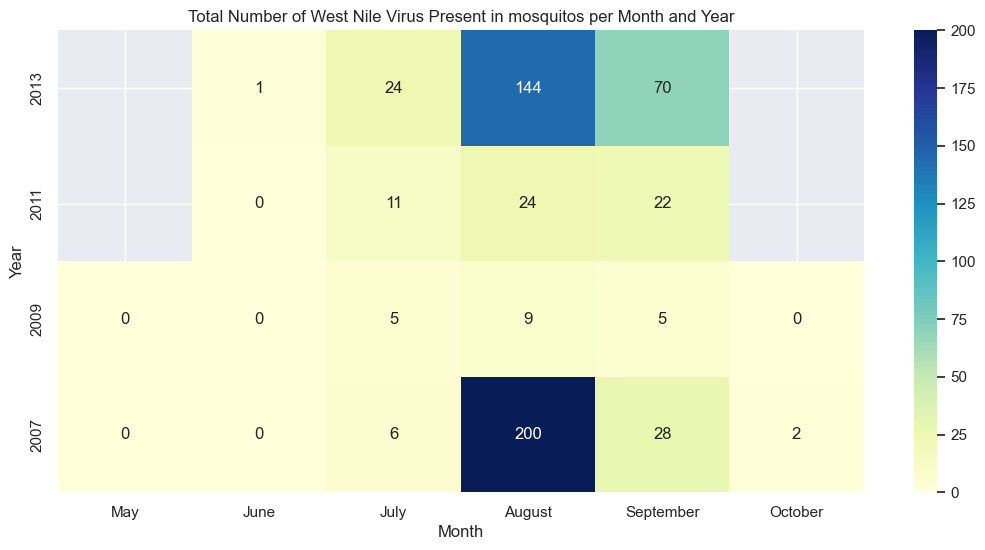

In [43]:
# Group by year and month, then sum the number of WnvPresent
monthly_wnv_present = train_withweather.groupby(['Year', 'Month'])['WnvPresent'].sum().reset_index()

# Pivot the table to have months as columns and years as rows
monthly_wnv_present_pivot = monthly_wnv_present.pivot(index='Year', columns='Month', values='WnvPresent')

# Mapping month numbers to month names for column labels
monthly_wnv_present_pivot.columns = monthly_wnv_present_pivot.columns.map(month_names)

# Sorting the index (years) in descending order
monthly_wnv_present_pivot = monthly_wnv_present_pivot.sort_index(ascending=False)

# Plotting the data with month names on the x-axis
plt.figure(figsize=(13, 6))
sns.heatmap(monthly_wnv_present_pivot, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Total Number of West Nile Virus Present in mosquitos per Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

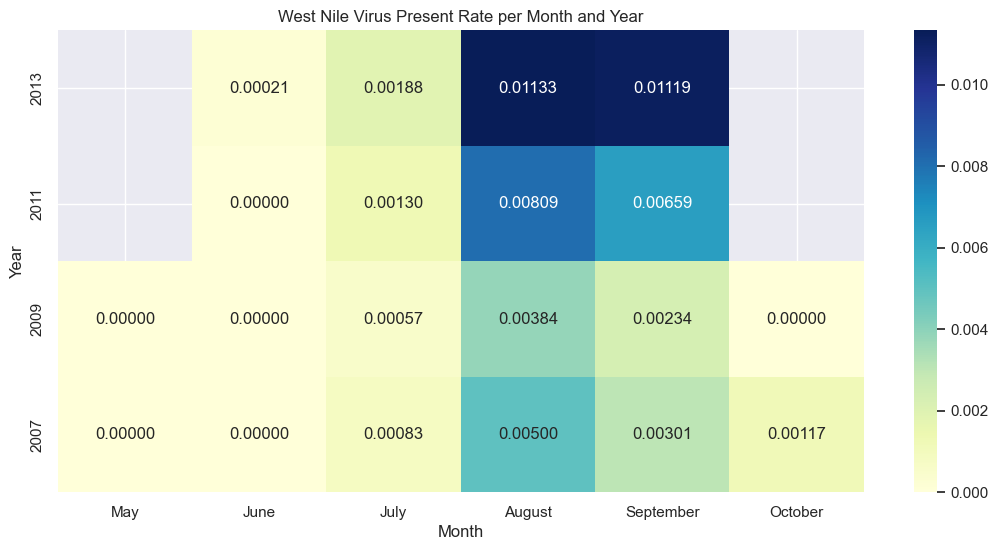

In [44]:
# Step 1: Group by year and month, then sum the number of WnvPresent and NumMosquitos
monthly_data = train_withweather.groupby(['Year', 'Month'])[['WnvPresent', 'NumMosquitos']].sum().reset_index()

# Step 2: Calculate the Wnv present rate
monthly_data['WnvPresentRate'] = monthly_data['WnvPresent'] / monthly_data['NumMosquitos']

# Step 3: Pivot the table to have months as columns and years as rows for the Wnv present rate
monthly_wnv_present_rate_pivot = monthly_data.pivot(index='Year', columns='Month', values='WnvPresentRate')

# Mapping month numbers to month names for column labels
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
            7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_wnv_present_rate_pivot.columns = monthly_wnv_present_rate_pivot.columns.map(month_names)

# Sorting the index (years) in descending order
monthly_wnv_present_rate_pivot = monthly_wnv_present_rate_pivot.sort_index(ascending=False)

# Plotting the data with month names on the x-axis
plt.figure(figsize=(13, 6))
sns.heatmap(monthly_wnv_present_rate_pivot, cmap="YlGnBu", annot=True, fmt='.5f')
plt.title('West Nile Virus Present Rate per Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [45]:
# Split 'Date_format' into 'month' and 'year'
train_withweather['month'] = train_withweather['Date'].dt.month
train_withweather['year'] = train_withweather['Date'].dt.year

# Display the updated dataframe
print(train_withweather[['Date', 'month', 'year']])

            Date  month  year
0     2007-05-29      5  2007
1     2007-05-29      5  2007
2     2007-05-29      5  2007
3     2007-05-29      5  2007
4     2007-05-29      5  2007
...          ...    ...   ...
10501 2013-09-26      9  2013
10502 2013-09-26      9  2013
10503 2013-09-26      9  2013
10504 2013-09-26      9  2013
10505 2013-09-26      9  2013

[10506 rows x 3 columns]


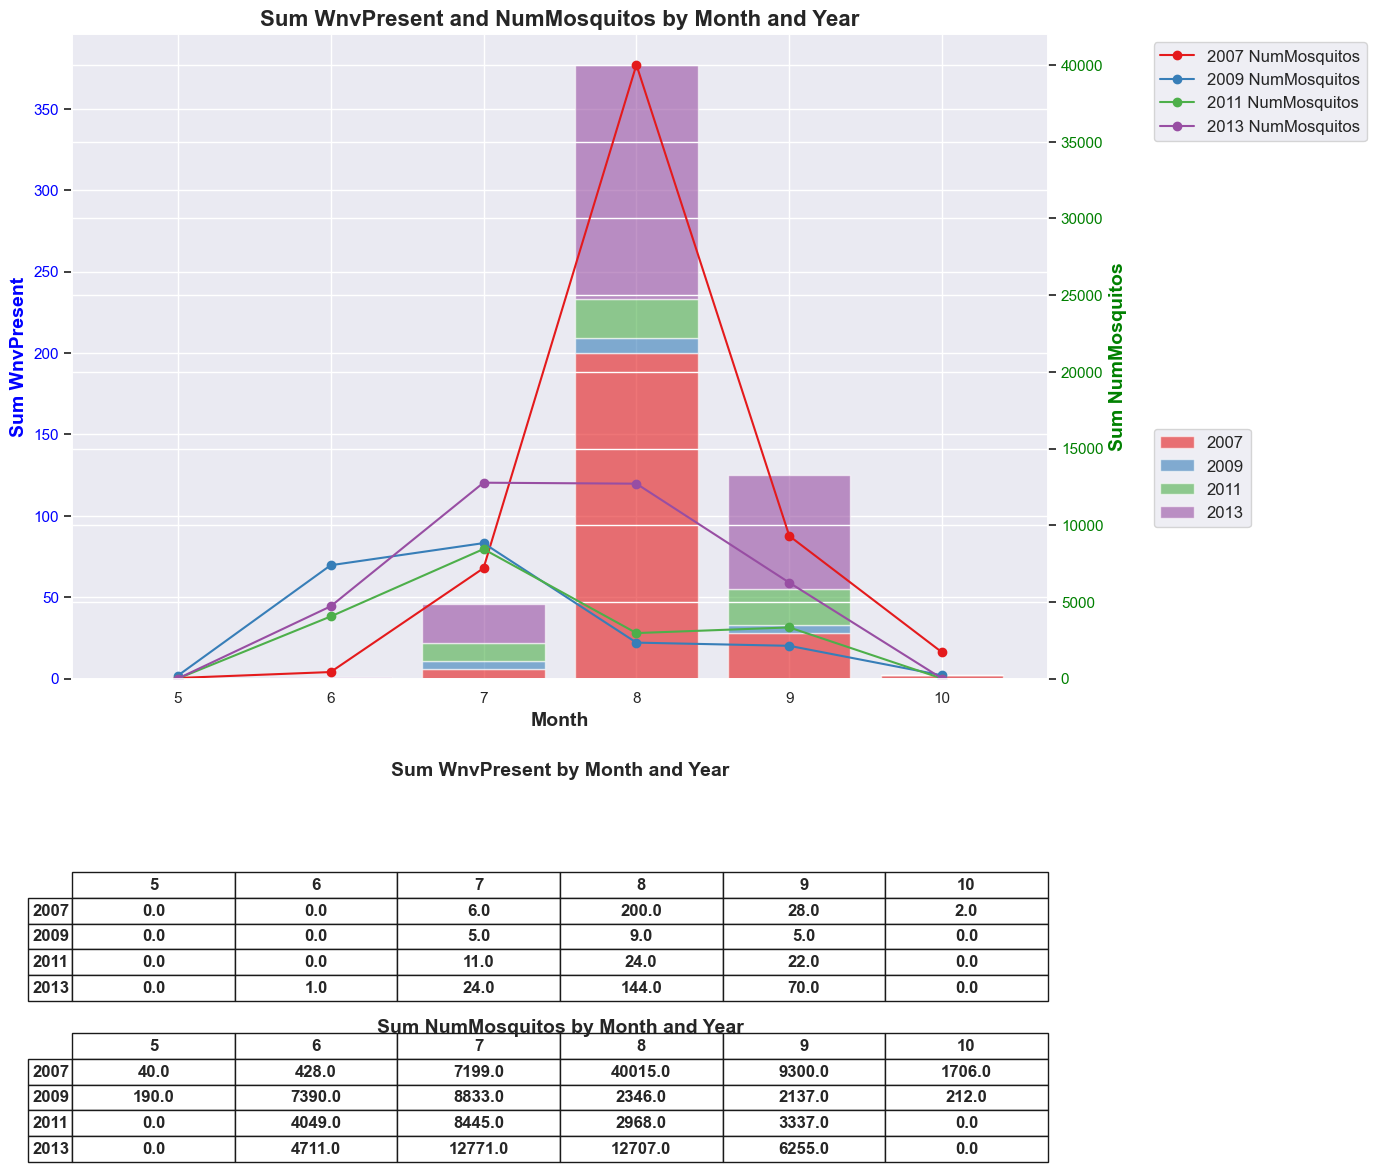

In [46]:
from helper_functions import plot_features_by_month_and_year

month_col = 'month'  # Replace this with the month column name
year_col = 'year'  # Replace this with the year column name
feature_1 = 'WnvPresent'
feature_2 = 'NumMosquitos'

# Plot features by month and year
plot_features_by_month_and_year(train_withweather, month_col, year_col, feature_1, feature_2, y2_limit=(0, None), agg_func='sum', color_1='blue', color_2='green')

**Observation: West Nile virus (Wnv) presence is typically detected starting in July each year, peaks in August, decreases in September, and subsides by October.**

## <a id='toc4_2_4_'></a> [4.2.4 Pesticide spray effect on mosquito population and presence of WNV](#toc0_)

**4. How does Spraying of Pesticide affects Number of Mosquitoes and WNV?**

Check the Unique Traps in weather dataset and do a classification of the spray location to Match the Trap ID of which the nearest trap is located. 

In [47]:
# Split 'Date_format' into 'month' and 'year'
spray['month'] = spray['Date'].dt.month
spray['year'] = spray['Date'].dt.year

# Display the updated dataframe
print(spray[['Date', 'month', 'year']])

            Date  month  year
0     2011-08-29      8  2011
1     2011-08-29      8  2011
2     2011-08-29      8  2011
3     2011-08-29      8  2011
4     2011-08-29      8  2011
...          ...    ...   ...
14830 2013-09-05      9  2013
14831 2013-09-05      9  2013
14832 2013-09-05      9  2013
14833 2013-09-05      9  2013
14834 2013-09-05      9  2013

[14835 rows x 3 columns]


In [48]:
# Extract trap locations from train_withweather dataframe
trap_coordinates = train_withweather[['Latitude', 'Longitude']]

# Fit the k-NN model using the trap coordinates
nbrs = NearestNeighbors(n_neighbors=1).fit(trap_coordinates)

# Predict the nearest trap for each spray location
spray_coordinates = spray[['Latitude', 'Longitude']]
distances, indices = nbrs.kneighbors(spray_coordinates)

# Add the nearest trap information to the spray DataFrame
spray['Trap'] = train_withweather.iloc[indices.flatten()]['Trap'].values
spray['Distance_to_Trap'] = distances.flatten()

# Display the updated DataFrame
display(spray)

Date   Latitude  Longitude  spray_count  month  year  Trap  \
0     2011-08-29  42.391623 -88.089163            1      8  2011  T009   
1     2011-08-29  42.391348 -88.089163            1      8  2011  T009   
2     2011-08-29  42.391022 -88.089157            1      8  2011  T009   
3     2011-08-29  42.390637 -88.089158            1      8  2011  T009   
4     2011-08-29  42.390410 -88.088858            1      8  2011  T009   
...          ...        ...        ...          ...    ...   ...   ...   
14830 2013-09-05  42.006587 -87.812355            1      9  2013  T016   
14831 2013-09-05  42.006192 -87.816015            1      9  2013  T016   
14832 2013-09-05  42.006022 -87.817392            1      9  2013  T016   
14833 2013-09-05  42.005453 -87.817423            1      9  2013  T016   
14834 2013-09-05  42.004805 -87.817460            1      9  2013  T016   

       Distance_to_Trap  
0              0.458769  
1              0.458530  
2              0.458242  
3              0.457908  
4              0.457563  
...                 ...  
14830          0.005086  
14831          0.007042  
14832          0.008110  
14833          0.008533  
14834          0.009035  

[14835 rows x 8 columns]

In [49]:
# Sum the spray count by 'Date_format' and 'Trap' (Nearest Trap)
spray['Spray_Count'] = 1
spray_intensity = spray.groupby(['Date','month','year', 'Trap']).agg({'Spray_Count': 'sum'}).reset_index()

# Display the new DataFrame
print(spray_intensity)

         Date  month  year  Trap  Spray_Count
0  2011-08-29      8  2011  T009           95
1  2011-09-07      9  2011  T006          820
2  2011-09-07      9  2011  T009          589
3  2011-09-07      9  2011  T014          208
4  2011-09-07      9  2011  T015          290
..        ...    ...   ...   ...          ...
71 2013-09-05      9  2013  T009            4
72 2013-09-05      9  2013  T015           54
73 2013-09-05      9  2013  T016          504
74 2013-09-05      9  2013  T143          133
75 2013-09-05      9  2013  T233          229

[76 rows x 5 columns]


In [50]:
# Convert 'Date_format' to week format in both dataframes
train_withweather['week'] = train_withweather['Date'].dt.isocalendar().week
spray_intensity['week'] = spray_intensity['Date'].dt.isocalendar().week

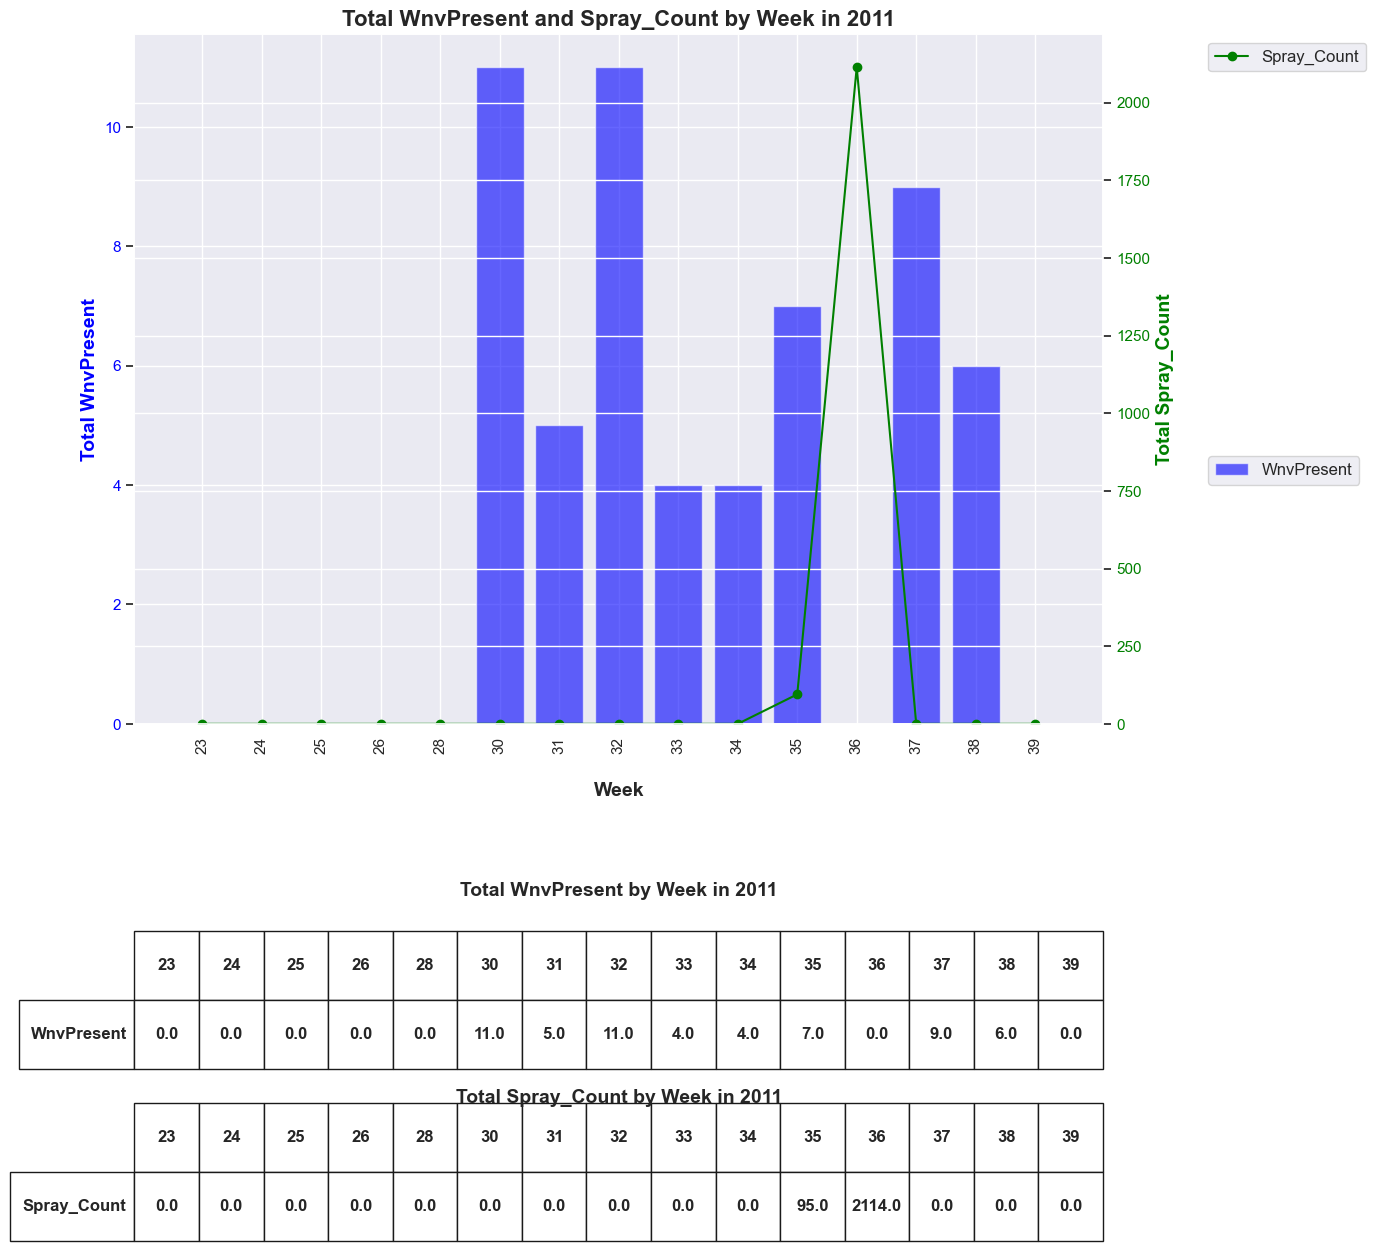

In [51]:
from helper_functions import plot_time_series

# Plot WnvPresent and Spray Count by Week for Year 2011
year = 2011
time_unit = 'week'  # Options: 'month', 'week', 'day'
date_col = 'Date'
feature_1 = 'WnvPresent'
feature_2 = 'Spray_Count'

# Plot features by the specified time unit
plot_time_series(train_withweather, spray_intensity, date_col, feature_1, feature_2, year, time_unit, y2_limit=(0, None), color_1='blue', color_2='green')

**WnvPresent was at zero count in week 36 which was the week with highest spray count. However, too little spray count data to justify on this observation. Further check on year 2013.**

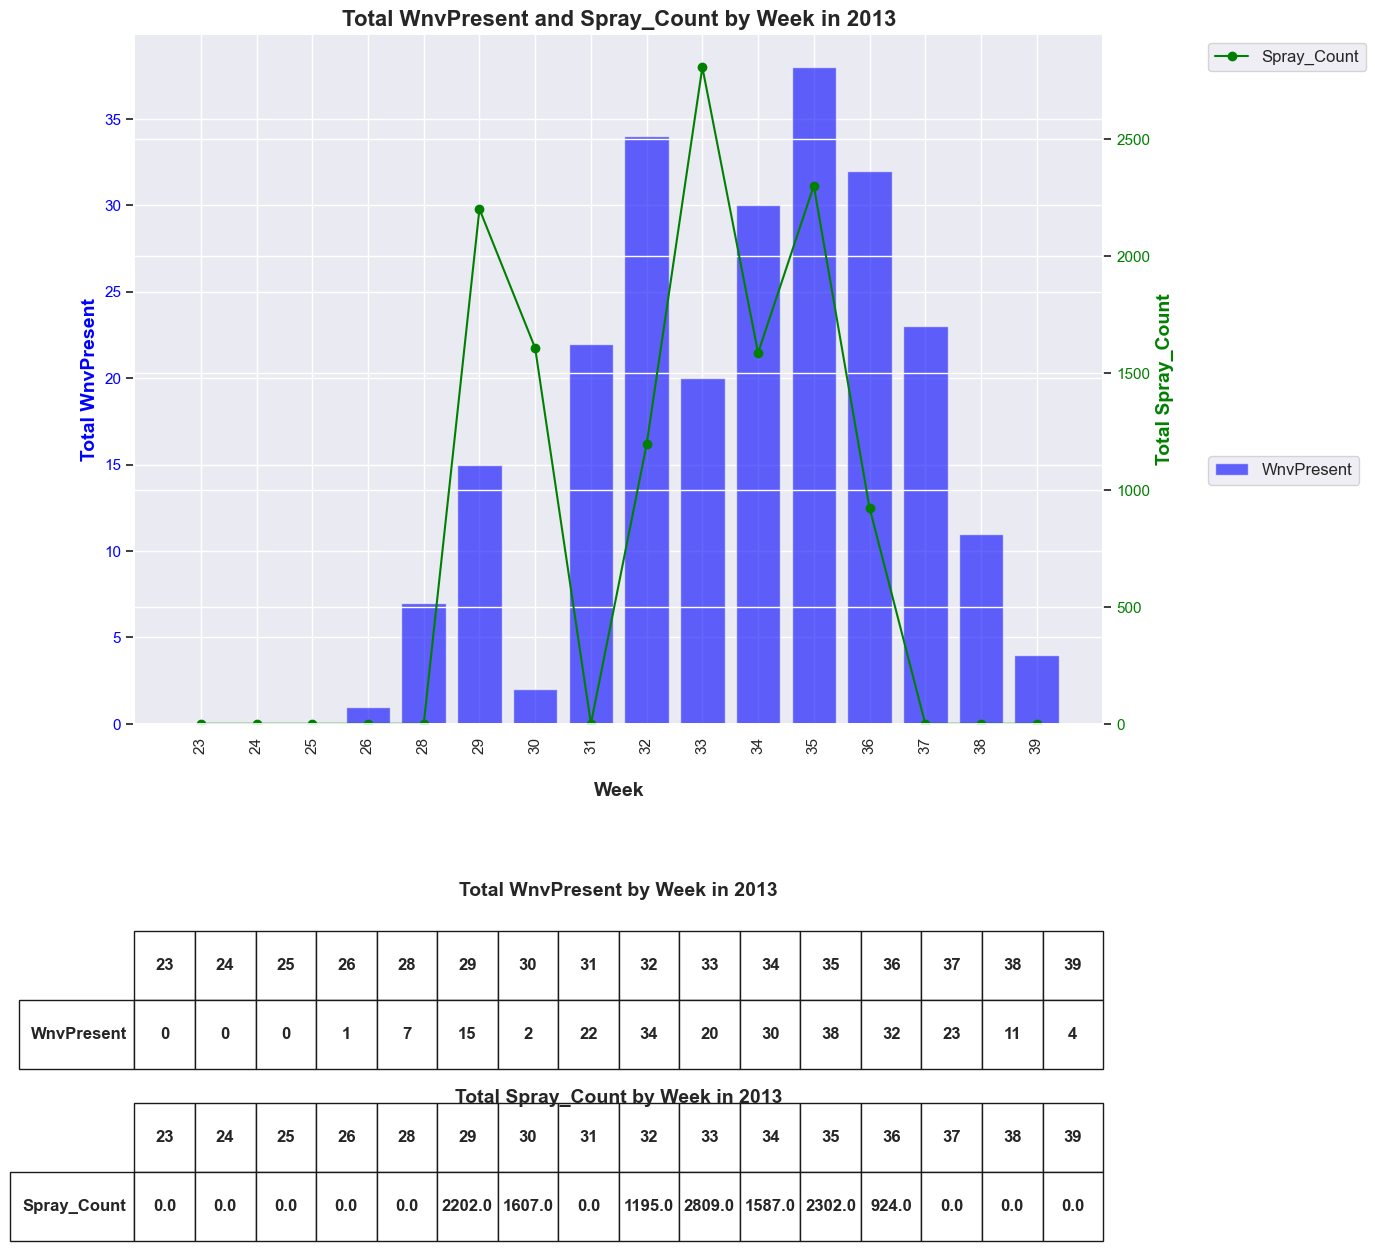

In [52]:
# Plot WnvPresent and Spray Count by Week for Year 2013
year = 2013
time_unit = 'week'  # Options: 'month', 'week', 'day'
date_col = 'Date'
feature_1 = 'WnvPresent'
feature_2 = 'Spray_Count'

# Plot features by the specified time unit
plot_time_series(train_withweather, spray_intensity, date_col, feature_1, feature_2, year, time_unit, y2_limit=(0, None), color_1='blue', color_2='green')

**Observations:**
- High spray count in week 29 has good effect in reducing WnV Present in following week, week 30's measurement.
- High spray count in week 33 seems to be taking effect on that week itself.
- However, high spray count in week 35 doesn't seem to be giving the same effect.

To zoom in and check by day.

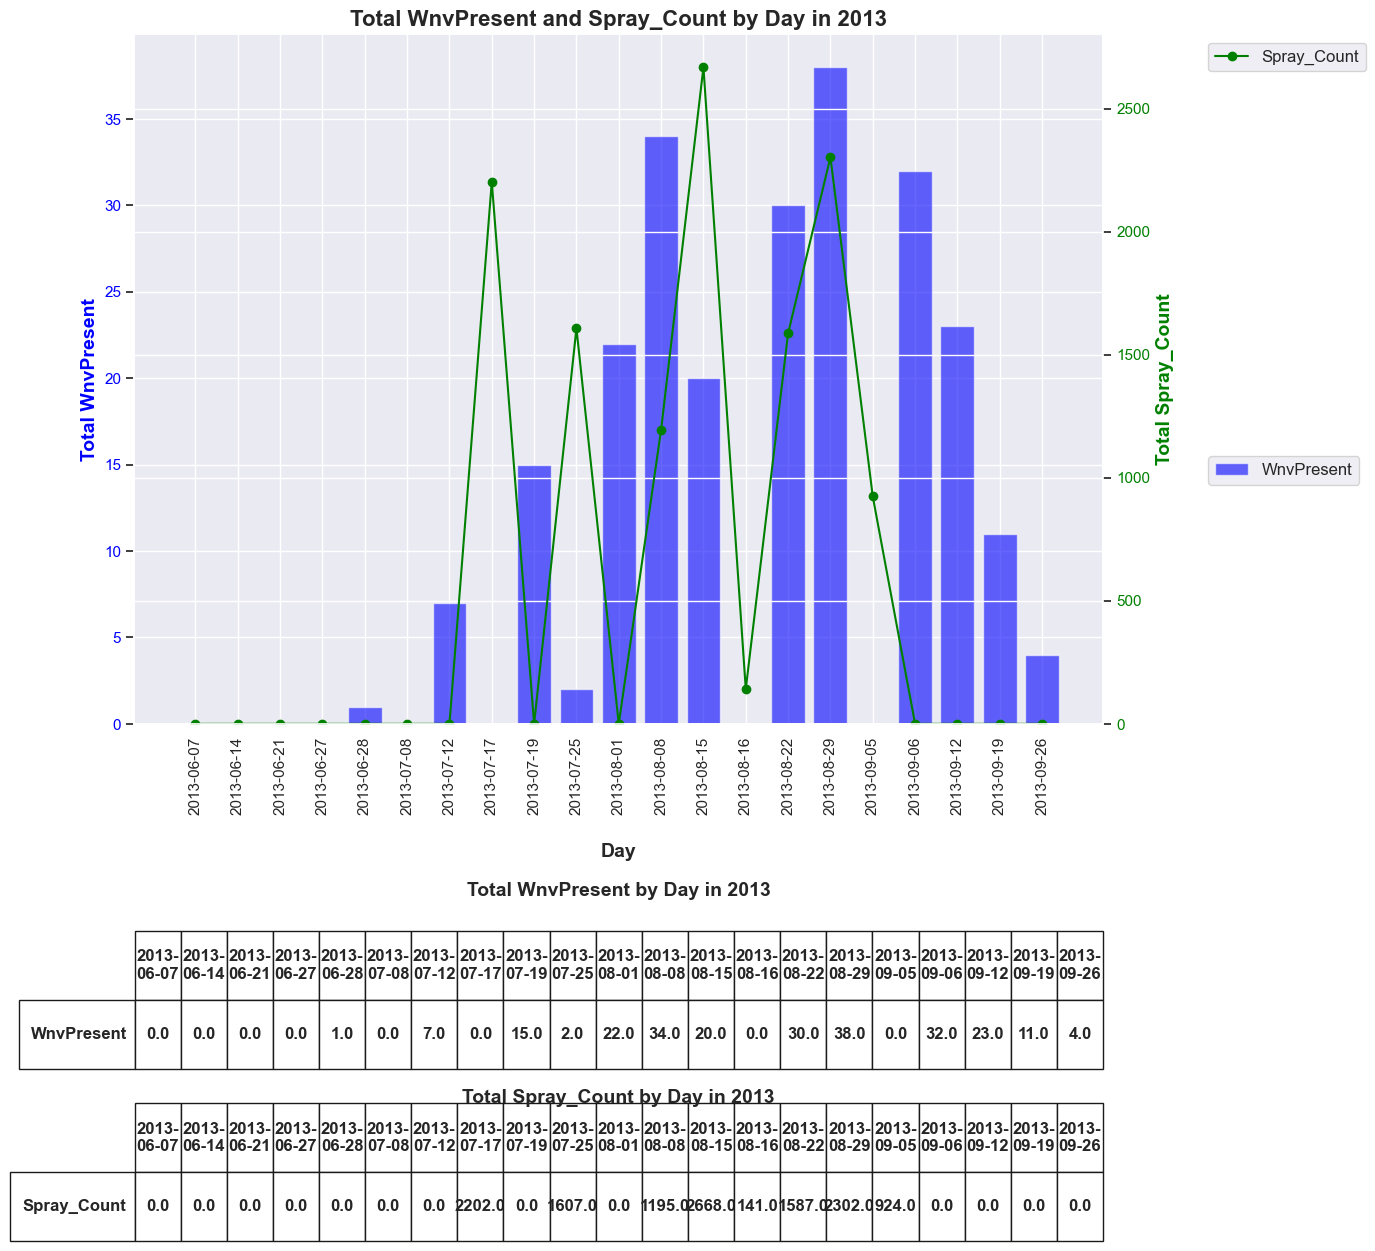

In [53]:
# Plot WnvPresent and Spray Count by Day for Year 2013
year = 2013
time_unit = 'day'  # Options: 'month', 'week', 'day'
date_col = 'Date'
feature_1 = 'WnvPresent'
feature_2 = 'Spray_Count'

# Plot features by the specified time unit
plot_time_series(train_withweather, spray_intensity, date_col, feature_1, feature_2, year, time_unit, y2_limit=(0, None), color_1='blue', color_2='green')

**Highest Spray Count Days:**
- 2013-07-17: WnvPresent was also zero on that day
- 2013-07-25: WnvPresent reduced significantly compared to 2013-07-19(previous measurement).
- 2013-08-15: WnvPresent not detected on the next day 2013-08-16. Rising again on 2013-08-01
- 2013-08-29: WnvPresnet not detected on next test date 2013-09-05.

**Observation:** 
- Spraying of pesticide seems to have effect in reducing WnvPresent count on that day or the next test date and then it rises again. 
- However, need to zoom in by geolocation to check whether the high WnvPresent was happening on the same location as the spray locations to confirm.

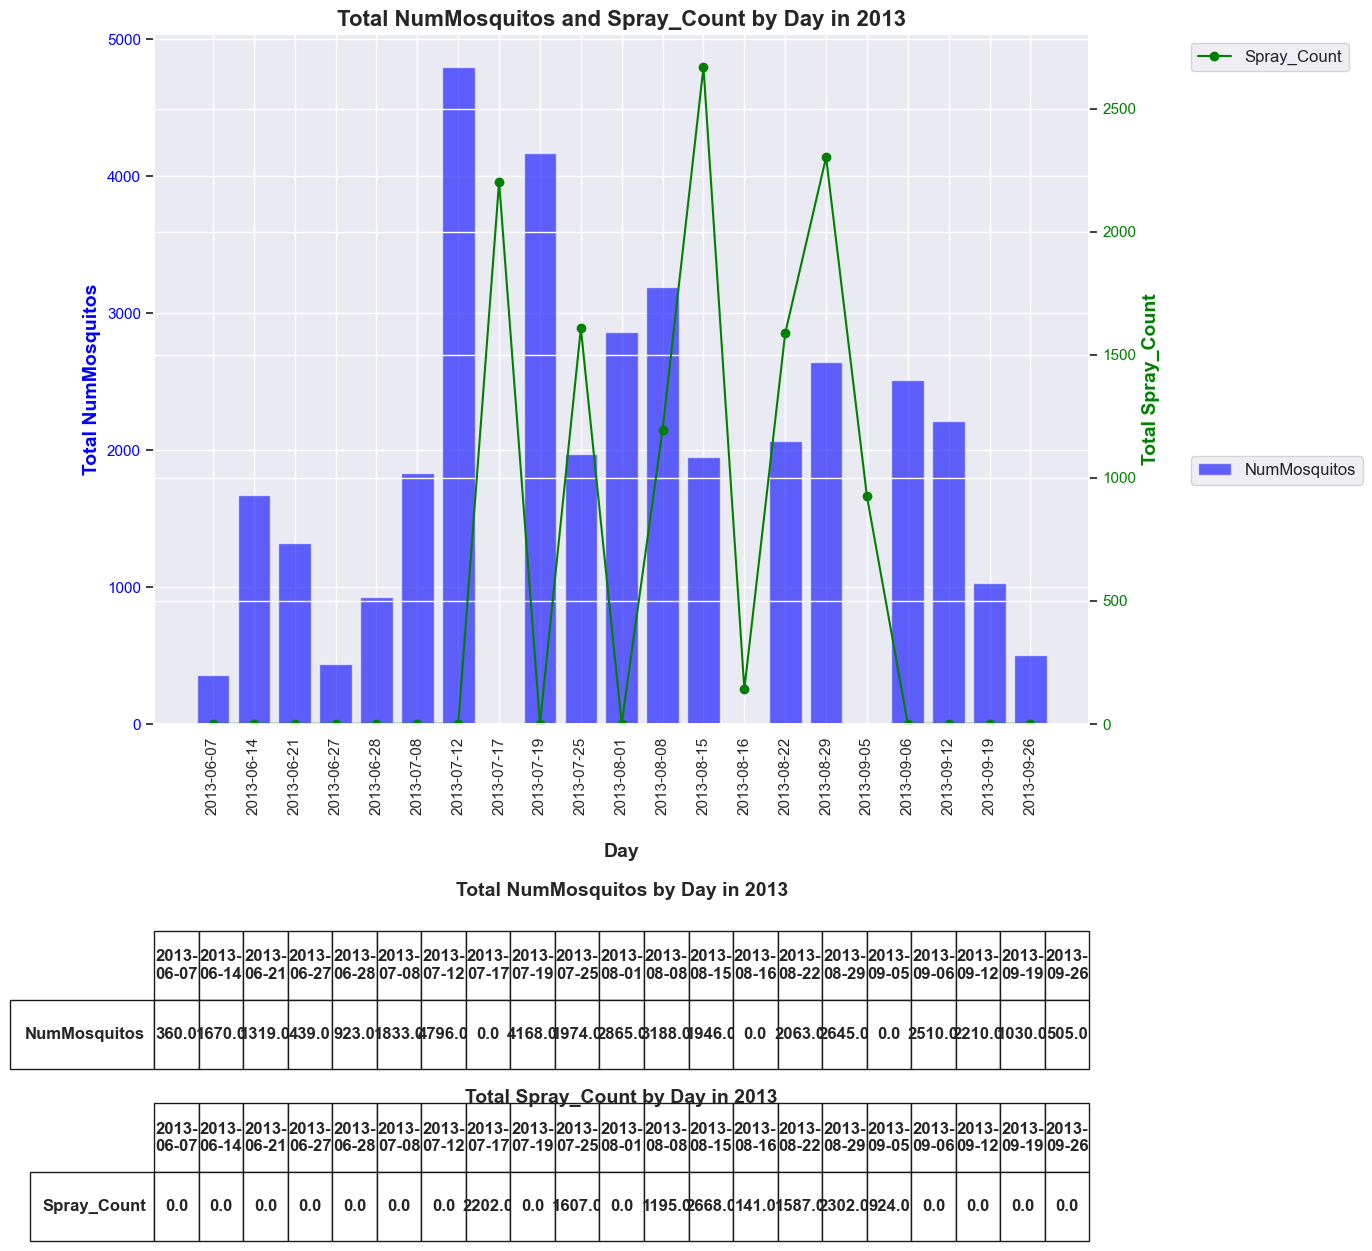

In [54]:
# Plot NumMosquitos and Spray Count by Day for Year 2013
year = 2013
time_unit = 'day'  # Options: 'month', 'week', 'day'
date_col = 'Date'
feature_1 = 'NumMosquitos'
feature_2 = 'Spray_Count'

# Plot features by the specified time unit
plot_time_series(train_withweather, spray_intensity, date_col, feature_1, feature_2, year, time_unit, y2_limit=(0, None), color_1='blue', color_2='green')

**Observations:**
- 2013/07/17: Zero mosquitos detected immediately after spraying; counts spiked again on 2013/07/19. Verify with geomap.
- 2013/07/25: No significant impact from spraying.
- 2013/08/15: Mosquitos reduced to zero the following day. Check further.
- 2013/08/29: Mosquito counts dropped to zero on 2013/09/05 but spiked on 2013/09/06. Potential mismatch between spray and high mosquito count locations. Investigate with geomap.

**Overall, mosquito counts remain high after spray events. Check geomap to determine if high counts and spray locations align.**

## <a id='toc4_2_5_'></a> [4.2.5 Geolocation visualisation of mosquito population and presence of WNV](#toc0_)

In [55]:
# Define the Coordinate Reference System (CRS)
crs = 'EPSG:4326'

# Create GeoDataFrame for the train_withweather
geometry_train = [Point(xy) for xy in zip(train_withweather['Longitude'], train_withweather['Latitude'])]
geo_df = gpd.GeoDataFrame(train_withweather, crs=crs, geometry=geometry_train)
display(geo_df.head())

# Create GeoDataFrame for the spray locations
geometry_spray = [Point(xy) for xy in zip(spray['Longitude'], spray['Latitude'])]
geo_spray_df = gpd.GeoDataFrame(spray, crs=crs, geometry=geometry_spray)
display(geo_spray_df.head())

# Data for weather stations
df_station = pd.DataFrame({
    'station': ["O'HARE INTERNATIONAL AIRPORT", "MIDWAY INTL ARPT"],
    'Latitude': [41.995, 41.786],
    'Longitude': [-87.933, -87.752]
})

# Create GeoDataFrame for weather stations
geometry_station = [Point(xy) for xy in zip(df_station['Longitude'], df_station['Latitude'])]
geo_station_df = gpd.GeoDataFrame(df_station, crs=crs, geometry=geometry_station)
display(geo_station_df.head())

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   ...  ResultSpeed  ResultDir  AvgSpeed  Month  CodeSum_Recode  Year  month  \
0  ...          5.8         18       6.5      5              13  2007      5   
1  ...          5.8         18       6.5      5              13  2007      5   
2  ...          5.8         18       6.5      5              13  2007      5   
3  ...          5.8         18       6.5      5              13  2007      5   
4  ...          5.8         18       6.5      5              13  2007      5   

   year  week                    geometry  
0  2007    22  POINT (-87.80099 41.95469)  
1  2007    22  POINT (-87.80099 41.95469)  
2  2007    22  POINT (-87.76928 41.99499)  
3  2007    22  POINT (-87.82481 41.97409)  
4  2007    22  POINT (-87.82481 41.97409)  

[5 rows x 36 columns]

Date   Latitude  Longitude  spray_count  month  year  Trap  \
0 2011-08-29  42.391623 -88.089163            1      8  2011  T009   
1 2011-08-29  42.391348 -88.089163            1      8  2011  T009   
2 2011-08-29  42.391022 -88.089157            1      8  2011  T009   
3 2011-08-29  42.390637 -88.089158            1      8  2011  T009   
4 2011-08-29  42.390410 -88.088858            1      8  2011  T009   

   Distance_to_Trap  Spray_Count                    geometry  
0          0.458769            1  POINT (-88.08916 42.39162)  
1          0.458530            1  POINT (-88.08916 42.39135)  
2          0.458242            1  POINT (-88.08916 42.39102)  
3          0.457908            1  POINT (-88.08916 42.39064)  
4          0.457563            1  POINT (-88.08886 42.39041)

station  Latitude  Longitude  \
0  O'HARE INTERNATIONAL AIRPORT    41.995    -87.933   
1              MIDWAY INTL ARPT    41.786    -87.752   

                     geometry  
0  POINT (-87.93300 41.99500)  
1  POINT (-87.75200 41.78600)

In [56]:
print(geo_spray_df.columns)

Index(['Date', 'Latitude', 'Longitude', 'spray_count', 'month', 'year', 'Trap',
       'Distance_to_Trap', 'Spray_Count', 'geometry'],
      dtype='object')


**To check on the period where high intensity spray was done and observe the effects of spray and how long it lasts. From the combination bar and line chart plotted, to check 2013-08-08 to 2013-08-16**

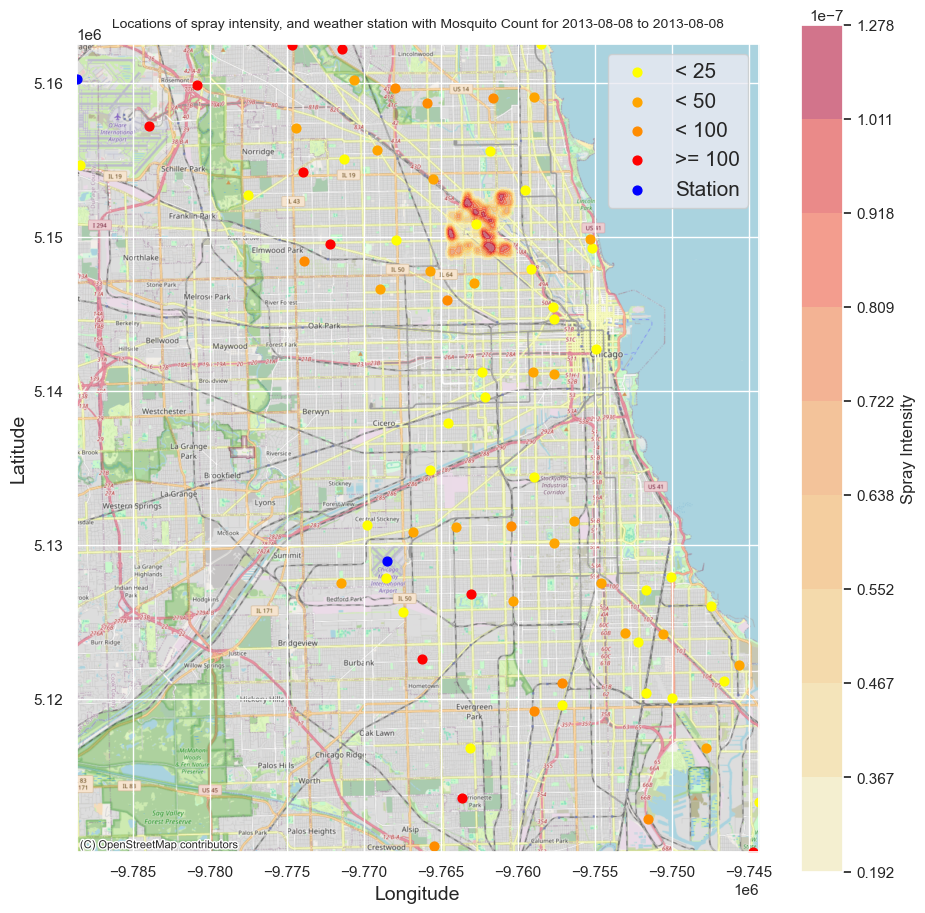

In [57]:
from helper_functions import plot_geomap_period

# Plot geomap on locations with spray intensity(Counts) , Mosquito Count for period of 2013-08-08 to 2013-08-08
start_date = pd.to_datetime('2013-08-08')
end_date = pd.to_datetime('2013-08-08')
date_col = 'Date'

# Plotting for a specific period
plot_geomap_period(geo_df, geo_spray_df, geo_station_df, date_col, start_date=start_date, end_date=end_date, mosquito_thresholds=[25, 50, 100])

**Spray was done on NorthEast area (Area 1) on 2013-08-08**

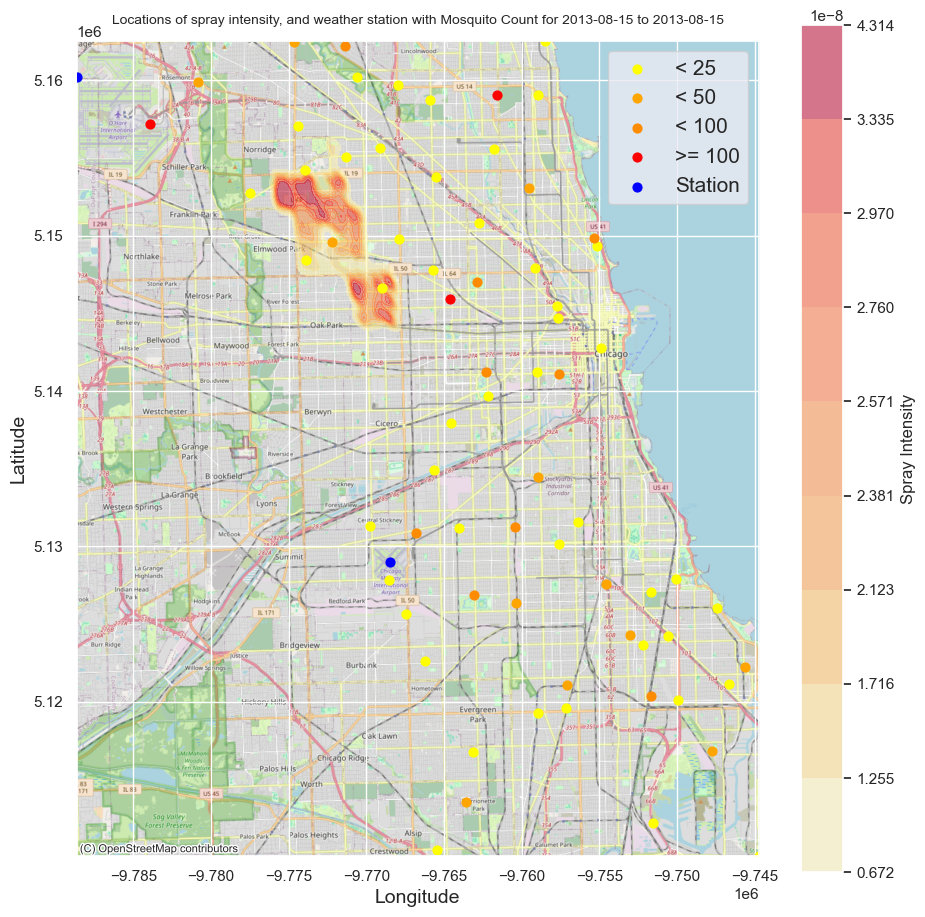

In [58]:
# Plot geomap on locations with spray intensity(Counts) , Mosquito Count for period of 2013-08-15 to 2013-08-15
start_date = pd.to_datetime('2013-08-15')
end_date = pd.to_datetime('2013-08-15')
date_col = 'Date'

# Plotting for a specific period
plot_geomap_period(geo_df, geo_spray_df, geo_station_df, date_col, start_date=start_date, end_date=end_date, mosquito_thresholds=[25, 50, 100])

**Observations:**
- Northeast area (Area 1) sprayed on 2013-08-08 mosquito count reduced.
- North area (Area 2: On the left of Area 1) was sprayed on 2013-08-15

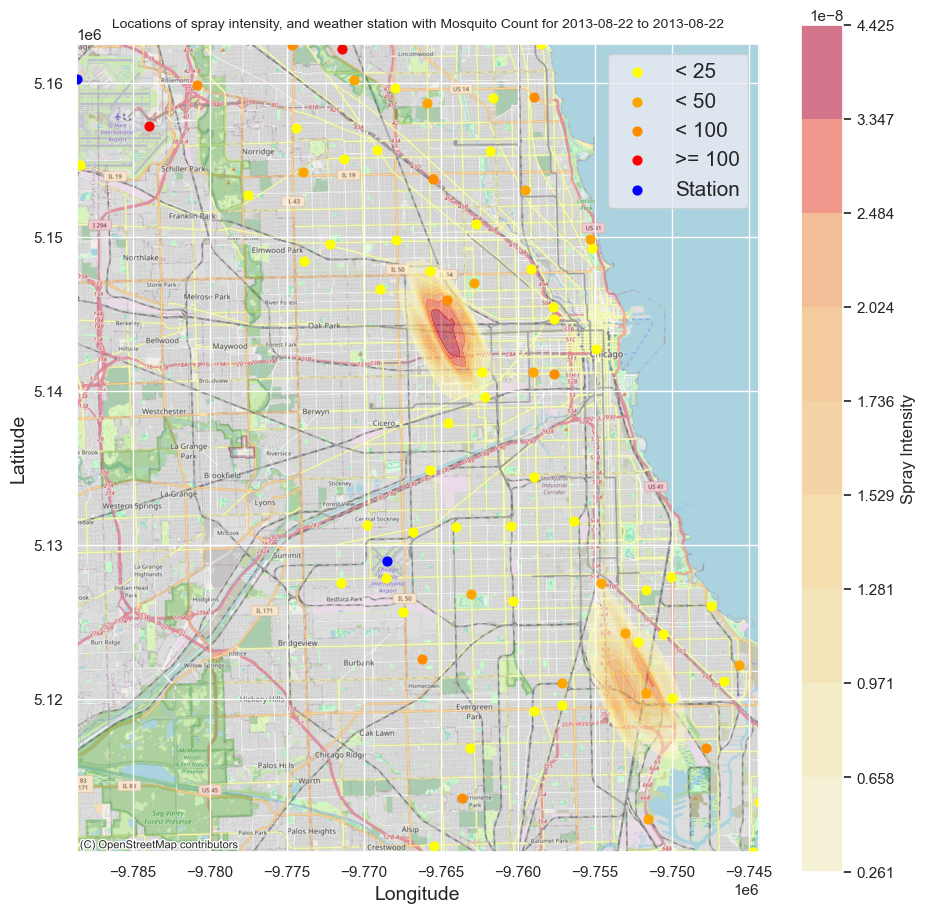

In [59]:
# Plot geomap on locations with spray intensity(Counts) , Mosquito Count for period of 2013-08-22 to 2013-08-22
start_date = pd.to_datetime('2013-08-22')
end_date = pd.to_datetime('2013-08-22')
date_col = 'Date'

# Plotting for a specific period
plot_geomap_period(geo_df, geo_spray_df, geo_station_df, date_col, start_date=start_date, end_date=end_date, mosquito_thresholds=[25, 50, 100])

**Observations:**
- Northeast area (Area 1) mosquito count increased again around 2 weeks after the first spray on 2013-08-08.
- North area (Area 2) mosquito count remains low after the spray on 2013-08-15.
- This spray on 2013-08-22 reduced mosquito count from >100 (Redspot on 2013-08-15) to below 100 <100.

**Conclusion:**
- The effect of spraying usually lasts about 2 weeks, after which mosquito counts tend to rise significantly.
- This supports the earlier suspicion from the Bar & Line Chart that high mosquito count locations do not align with high-intensity spray areas.

**To check on hotspot locations with high Wnv and high NumMosquito**

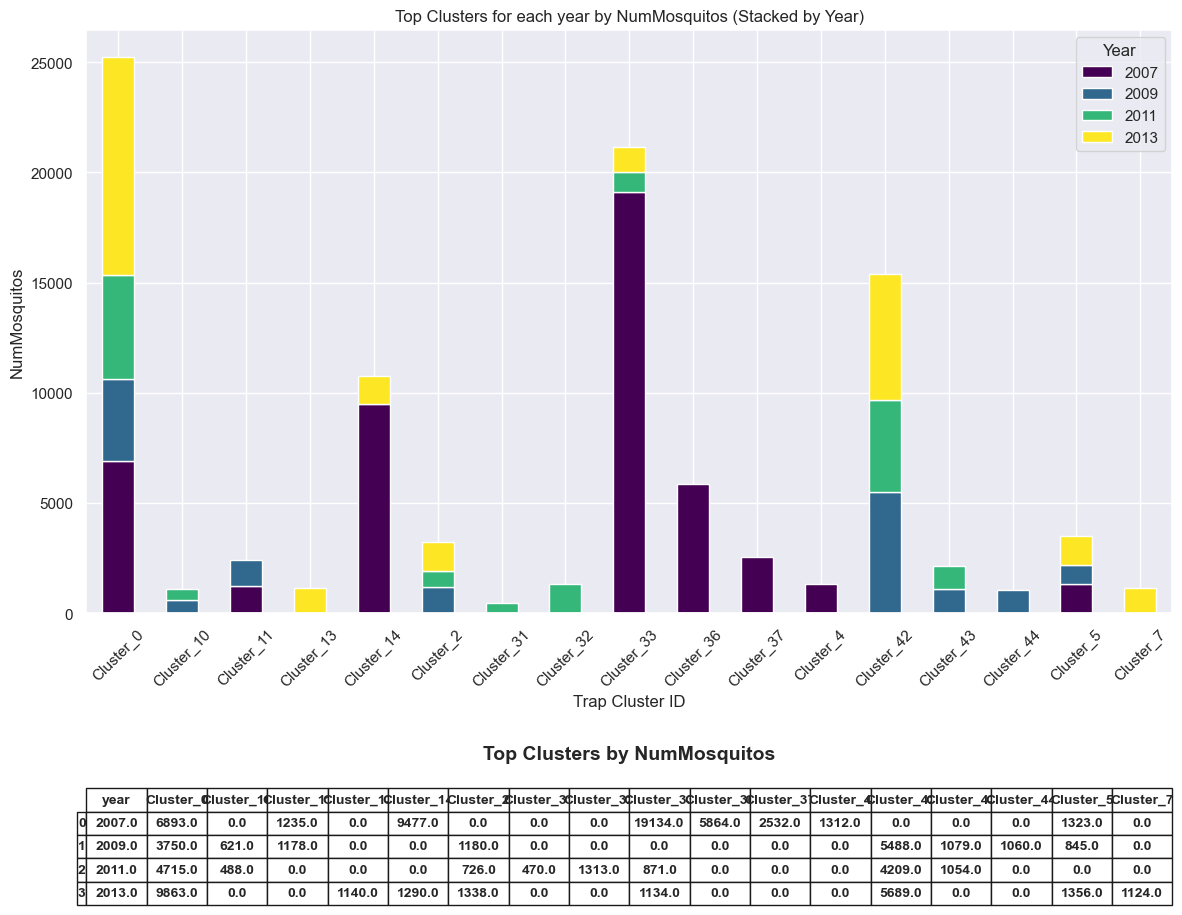

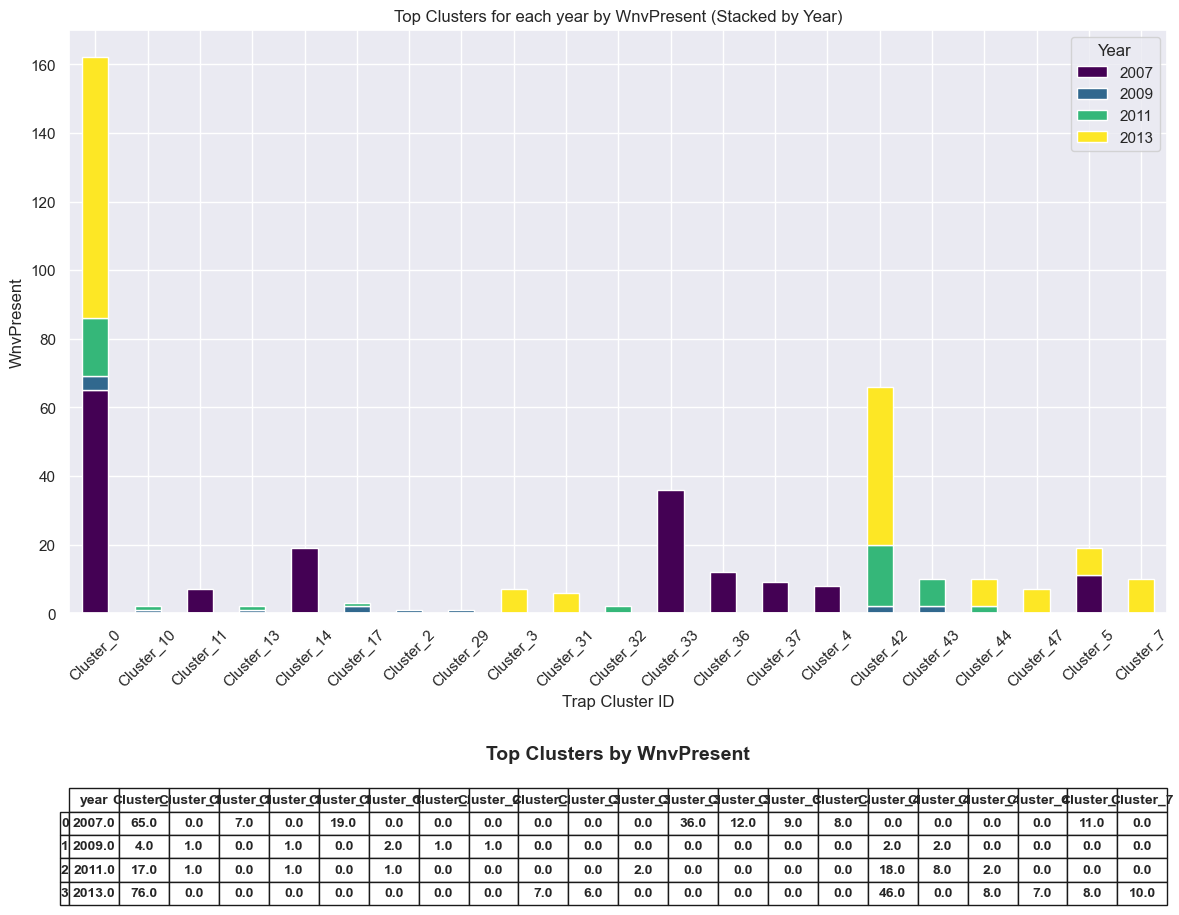

In [60]:
from helper_functions import plot_top_8_clusters_stacked, get_top_8_clusters_combined


coords = train_withweather[['Latitude', 'Longitude']].values
kms_per_radian = 6371.0088  # Earth radius in kilometers
epsilon = 2 / kms_per_radian  # 2 kilometers in radians

# Perform DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# Add 'Trap Cluster' column to the dataframe
train_withweather['Trap Cluster'] = cluster_labels

# Create a column 'Trap Cluster ID'
train_withweather['Trap Cluster ID'] = 'Cluster_' + train_withweather['Trap Cluster'].astype(str)

# Calculate the center latitude and longitude for each trap cluster
train_withweather['trapclust_lat'] = train_withweather.groupby('Trap Cluster')['Latitude'].transform('mean')
train_withweather['trapclust_long'] = train_withweather.groupby('Trap Cluster')['Longitude'].transform('mean')

# Create the new dataframe with trap clusters
train_weather_trapclusters = train_withweather.copy()

# Get the top 8 clusters combined dataframe for both features
y_features = ['NumMosquitos', 'WnvPresent']
top_8_clusters_combined = get_top_8_clusters_combined(train_weather_trapclusters, y_features)

# Plot Top 8 clusters for 'NumMosquitos'
plot_top_8_clusters_stacked(top_8_clusters_combined, y_feature='NumMosquitos')

# Plot Top 8 clusters for 'WnvPresent'
plot_top_8_clusters_stacked(top_8_clusters_combined, y_feature='WnvPresent')

**Observation:**
- Consistent high counts from the same clusters observed. High number of mosquito indeed increases the chances of West Nile Virus Present.

**Hence, targeting/eliminating the number of mosquitoes should directly reduce West Nile Virus Occurences.**

**To check the Clusters with the Highest number of Mosquitoes.**

In [61]:
# Count the total number of unique clusters in the entire dataset
total_clusters = train_weather_trapclusters['Trap Cluster ID'].nunique()

print(f"Total number of clusters in the dataset: {total_clusters}")

Total number of clusters in the dataset: 48


**To check on the Top 25 (About 50%) clusters locations and also percentage of Mosquitoes and Wnv these Top 25 Clusters covered:**

Trap Cluster ID  NumMosquitos  cluster_latitude  cluster_longitude
0        Cluster_0         25221         41.952485         -87.754004
1       Cluster_33         21668         41.673408         -87.599862
2       Cluster_42         15386         41.974689         -87.890615
3       Cluster_14         11271         41.726945         -87.589457
4       Cluster_36          6674         41.690515         -87.534756
5        Cluster_2          4165         41.868705         -87.651766
6        Cluster_5          3943         41.726746         -87.661262
7       Cluster_37          3315         41.704572         -87.565666
8       Cluster_11          3122         41.662014         -87.724608
9       Cluster_13          2575         41.682587         -87.707973
10      Cluster_15          2488         41.848047         -87.684706
11      Cluster_43          2327         41.957799         -87.930995
12      Cluster_32          2161         41.798697         -87.736812
13      Cluster_44          2014         41.743402         -87.731435
14       Cluster_7          1944         41.999595         -87.679108
15      Cluster_31          1740         41.799197         -87.647934
16      Cluster_40          1699         41.659112         -87.538693
17      Cluster_29          1661         41.752891         -87.603953
18      Cluster_20          1549         41.771768         -87.747927
19      Cluster_10          1543         41.801498         -87.763416
20      Cluster_41          1477         41.992478         -87.862995
21       Cluster_8          1388         41.913319         -87.753627
22      Cluster_34          1368         41.678618         -87.559308
23      Cluster_21          1356         41.771660         -87.703047
24      Cluster_35          1316         41.738624         -87.548295

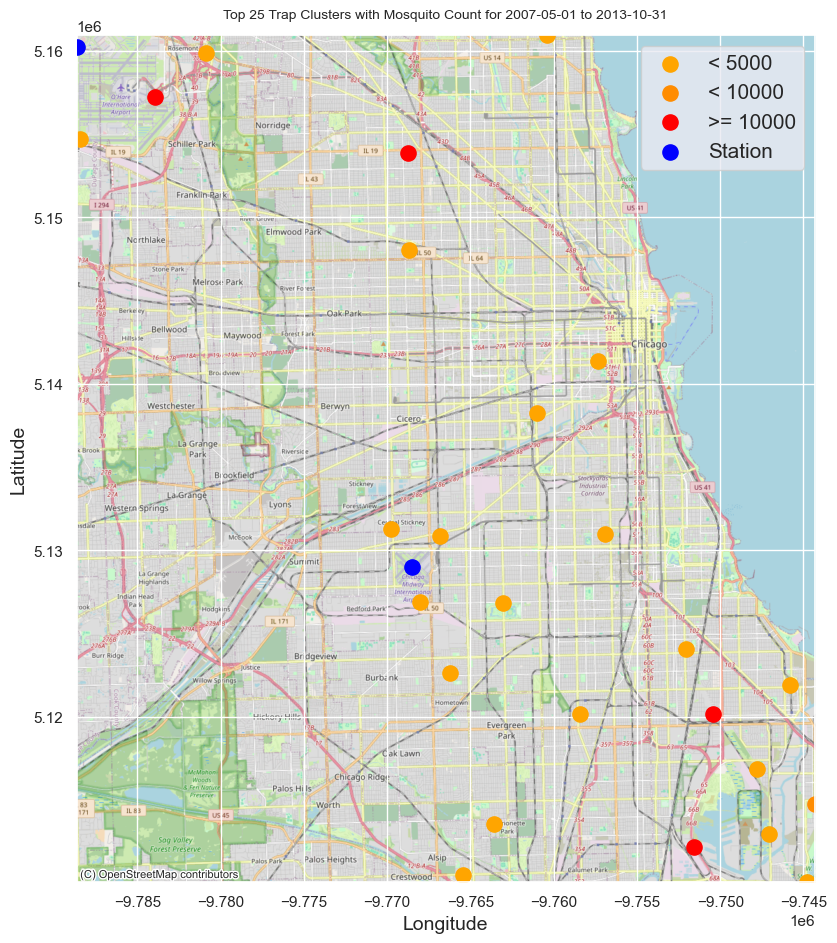

In [62]:
from helper_functions import get_top_25_clusters_combined, plot_geomap_clusters_period

# Generate the top 25 clusters combined dataframe
top_25_clusters_combined = get_top_25_clusters_combined(train_weather_trapclusters)

# Display the dataframe
display(top_25_clusters_combined[['Trap Cluster ID', 'NumMosquitos', 'cluster_latitude', 'cluster_longitude']])

# Example usage of the helper function to plot geomap
start_date = pd.to_datetime('2007-05-01')
end_date = pd.to_datetime('2013-10-31')
date_col = 'Date'

# Plotting for a specific period
plot_geomap_clusters_period(
    train_weather_trapclusters, geo_station_df, top_25_clusters_combined, 
    date_col, start_date=start_date, end_date=end_date, mosquito_thresholds=[1000, 5000, 10000]
)

In [63]:
# Calculate total NumMosquitos for all traps
total_num_mosquitos_all = train_weather_trapclusters['NumMosquitos'].sum()

# Calculate total NumMosquitos for the top 25 clusters
total_num_mosquitos_top_25 = top_25_clusters_combined['NumMosquitos'].sum()

# Calculate the percentage
percentage_top_25 = (total_num_mosquitos_top_25 / total_num_mosquitos_all) * 100

print(f"The top 25 clusters represent {percentage_top_25:.2f}% of the total NumMosquitos.")

The top 25 clusters represent 91.36% of the total NumMosquitos.


In [64]:
# def get_top_25_clusters_combined(train_weather_trapclusters):
#     # Group by 'Trap Cluster ID' and calculate the sum for 'NumMosquitos' and 'WnvPresent'
#     grouped = train_weather_trapclusters.groupby('Trap Cluster ID').agg({
#         'NumMosquitos': 'sum',
#         'WnvPresent': 'sum'
#     }).reset_index()
    
#     # Sort the dataframe by 'NumMosquitos' and select the top 25 rows
#     top_25_clusters_combined = grouped.nlargest(25, 'NumMosquitos')
    
#     # Merge to get the cluster center latitude and longitude
#     top_25_clusters_combined = top_25_clusters_combined.merge(
#         train_weather_trapclusters[['Trap Cluster ID', 'trapclust_lat', 'trapclust_long']].drop_duplicates(),
#         on='Trap Cluster ID',
#         how='left'
#     )
    
#     # Rename columns for clarity
#     top_25_clusters_combined = top_25_clusters_combined.rename(
#         columns={'trapclust_lat': 'cluster_latitude', 'trapclust_long': 'cluster_longitude'}
#     )
    
#     return top_25_clusters_combined


In [65]:
from helper_functions import get_top_25_clusters_combined

# Get the top 25 clusters combined dataframe
top_25_clusters_combined = get_top_25_clusters_combined(train_weather_trapclusters)

# Calculate total WnvPresent for all traps
total_wnv_present_all = train_weather_trapclusters['WnvPresent'].sum()

# Calculate total WnvPresent for the top 25 clusters
total_wnv_present_top_25 = top_25_clusters_combined['WnvPresent'].sum()

# Calculate the percentage
percentage_top_25_wnv_present = (total_wnv_present_top_25 / total_wnv_present_all) * 100

print(f"The top 25 clusters represent {percentage_top_25_wnv_present:.2f}% of the total WnvPresent.")


The top 25 clusters represent 86.57% of the total WnvPresent.


**Observation:**
- Percentage of Number of Mosquitoes in Top 25 cluster: 91.36%
- Percentage of WnvPresent in Top 25 cluster: 86.57%

Since the Top 25 clusters account for most mosquito counts and West Nile Virus cases, consider adjusting the threshold for pesticide spraying based on recent trends to enhance spray & cost effectiveness.

In [66]:
from helper_functions import get_clusters_and_traps

# # Create a DataFrame to list out clusters and unique trap IDs
# def get_clusters_and_traps(train_withweather_df):
#     # Group by 'Trap Cluster ID' and collect unique trap IDs
#     cluster_traps = train_withweather_df.groupby('Trap Cluster')['Trap'].unique().reset_index()
    
#     # Rename columns for clarity
#     cluster_traps = cluster_traps.rename(columns={'Trap Cluster': 'Cluster', 'Trap': 'Trap IDs'})
    
#     # Sort by Cluster for better readability
#     cluster_traps = cluster_traps.sort_values(by='Cluster').reset_index(drop=True)
    
#     return cluster_traps

# Generate the 'Cluster_Traps' DataFrame with unique Trap IDs
Cluster_Traps = get_clusters_and_traps(train_withweather)

# Display the DataFrame
display(Cluster_Traps)

Cluster                                           Trap IDs
0         0  [T002, T007, T015, T045, T050, T143, T009, T01...
1         1                                       [T046, T049]
2         2               [T048, T091, T090, T092, T145, T051]
3         3                                      [T054, T054C]
4         4                                             [T086]
5         5  [T094, T096, T159, T089, T085, T161, T072, T23...
6         6                                             [T129]
7         7               [T148, T028, T149, T150, T018, T231]
8         8                           [T153, T154, T222, T230]
9         9                                             [T011]
10       10                                             [T031]
11       11                                             [T135]
12       12                           [T152, T040, T036, T063]
13       13                                             [T158]
14       14                           [T162, T138, T107, T227]
15       15  [T034, T043, T047, T088, T044, T035, T060, T07...
16       16                                             [T084]
17       17                                             [T095]
18       18                                             [T061]
19       19                                             [T062]
20       20                           [T065, T067, T156, T035]
21       21                                             [T066]
22       22                                             [T069]
23       23                                             [T070]
24       24                                       [T071, T155]
25       25                                       [T073, T077]
26       26                                             [T075]
27       27                                             [T076]
28       28                                             [T079]
29       29                                 [T080, T083, T102]
30       30                                             [T081]
31       31                                       [T082, T226]
32       32                                             [T114]
33       33                                             [T115]
34       34                                             [T200]
35       35                                 [T206, T209, T099]
36       36                           [T212, T215, T100, T103]
37       37                                             [T128]
38       38                                             [T078]
39       39                                             [T097]
40       40                                             [T221]
41       41                                             [T009]
42       42                                             [T900]
43       43                                             [T903]
44       44                                             [T225]
45       45                                             [T224]
46       46                                             [T229]
47       47                                             [T235]

In [67]:
# Define the path where you want to save the CSV file
file_path = 'Cluster_Traps.csv'

# Export the DataFrame to CSV
# Cluster_Traps.to_csv(file_path, index=False)

# <a id='toc5_'></a> [5.0 Model Development](#toc0_)

## <a id='toc5_1_'></a> [5.1 Feature Engineering](#toc0_)

1. Drop unused columns
2. Split weather data by station and merge horizontally on date
3. Merge weather data to train and test df on date
4. Create Day, Month, Year columns in both Train and Test df
5. Remove letters from Train and Test Trap feature
6. Convert numerical data object type (e.g '1') in Train and Test to numeric (int, float)
7. Consolidate data with Groupby.
8. Define X = Features and Y = target.
9. Split catergorical and numerical features in to separate lists.
10. Create pipeline to process categorical and numerical data

In [68]:
# Split the dataframe into two based on the Station column, dropping 'Unnamed: 0'
df_station1 = df_weather[df_weather['Station'] == 1].drop(columns=['Station'])
df_station2 = df_weather[df_weather['Station'] == 2].drop(columns=['Station'])

# Merge the dataframes horizontally on the Date column
df_weather_merged = pd.merge(df_station1, df_station2, on='Date', suffixes=('_Station1', '_Station2'))

df_weather_merged.drop(columns = ['Month_Station1', 'Month_Station2'], inplace=True)
# Display the cleaned merged dataframe
df_weather_merged.head()

Date  Tmax_Station1  Tmin_Station1  Tavg_Station1  DewPoint_Station1  \
0 2007-05-01           28.3           10.0           19.4               10.6   
1 2007-05-02           15.0            5.6           10.6                5.6   
2 2007-05-03           18.9            7.8           13.3                4.4   
3 2007-05-04           18.9            9.4           14.4                5.0   
4 2007-05-05           18.9           11.7           15.6                3.3   

   WetBulb_Station1  Heat_Station1  Cool_Station1 Sunrise_Station1  \
0              13.3            0.0            2.0             0448   
1               8.3           14.0            0.0             0447   
2               8.9            9.0            0.0             0446   
3              10.0            7.0            0.0             0444   
4               9.4            5.0            0.0             0443   

  Sunset_Station1  ... Sunrise_Station2  Sunset_Station2  CodeSum_Station2  \
0            1849  ...                -                -                MD   
1            1850  ...                -                -             BR HZ   
2            1851  ...                -                -                HZ   
3            1852  ...                -                -                MD   
4            1853  ...                -                -                MD   

   PrecipTotal_Station2  StnPressure_Station2  SeaLevel_Station2  \
0                   0.0                 29.18              29.82   
1                   0.0                 29.44              30.08   
2                   0.0                 29.46              30.12   
3                   0.0                 29.36              30.04   
4                   0.0                 29.46              30.09   

   ResultSpeed_Station2  ResultDir_Station2  AvgSpeed_Station2  \
0                   2.7                  25                9.6   
1                  13.3                   2               13.4   
2                  12.9                   6               13.2   
3                  10.1                   7               10.4   
4                  11.2                   7               11.5   

   CodeSum_Recode_Station2  
0                       16  
1                       13  
2                        5  
3                       16  
4                       16  

[5 rows x 35 columns]

In [69]:
# convert Date to DateTime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Merged df train & test
df_train_comb = pd.merge(df_train, df_weather_merged, on='Date', how='inner')
df_test_comb = pd.merge(df_test, df_weather_merged, on='Date', how='inner')

In [70]:
print(df_train_comb.shape)
print(df_test_comb.shape)

(10506, 46)
(116293, 45)


In [71]:
from helper_functions import extract_date_features

# Apply the function to both train and test combined datasets
df_train_comb = extract_date_features(df_train_comb)
df_test_comb = extract_date_features(df_test_comb)

print(df_test_comb.shape)
print(df_train_comb.shape)

(116293, 52)
(10506, 53)


In [72]:
from helper_functions import extract_zipcode

manual_zip_mapping = {
    "South Vincennes Avenue, Chicago, IL, USA": "60620",
    "Chicago, IL, USA": "60613",
    "6400 West Strong Street, Chicago, IL, USA": "60656",
    "South Doty Avenue, Chicago, IL, USA": "60628",
    "South Stony Island Avenue, Chicago, IL, USA": "60617",
    "South Torrence Avenue, Chicago, IL, USA": "60617",
    "East 91st Street, Chicago, IL, USA": "60619",
    "South Cottage Grove Avenue, Chicago, IL, USA": "60619",
    "West 37th Place, Chicago, IL, USA": "60609",
    "East 91st Place, Chicago, IL, USA": "60619",
    "West Garfield Boulevard, Chicago, IL, USA": "60609",
    "South Wallace Street, Chicago, IL, USA": "60609",
    "South Oglesby Avenue, Chicago, IL, USA": "60649",
    "4300 N ASHLAND AVE OVERPASS, Chicago, IL, USA": "60613"
}

# # Function to extract ZIP code from address
# def extract_zipcode(address):
#     if address in manual_zip_mapping:
#         return 'z'+ manual_zip_mapping[address]
#     match = re.search(r'\b\d{5}\b', address)
#     if match:
#         return 'z' + match.group(0)
#     return 'N/A'

# Apply the function to create a new 'ZIPCode' column in the train dataset
df_train_comb['zip'] = df_train_comb['Address'].map(lambda x: extract_zipcode(x,manual_zip_mapping))
df_test_comb['zip'] = df_test_comb['Address'].map(lambda x: extract_zipcode(x, manual_zip_mapping))


# df_train_comb['zip'] = df_train_comb['Address'].apply(extract_zipcode, manual_zip_mapping)
# df_test_comb['zip'] = df_test_comb['Address'].apply(extract_zipcode, manual_zip_mapping)

zip_train = df_train_comb['zip'].unique()
zip_test = df_test_comb['zip'].unique()

print(zip_train)
print(zip_test)

['z60634' 'z60646' 'z60656' 'z60614' 'z60654' 'z60608' 'z60642' 'z60647'
 'z60643' 'z60611' 'z60631' 'z60645' 'z60651' 'z60620' 'z60618' 'z60630'
 'z60659' 'z60638' 'z60622' 'z60607' 'z60605' 'z60803' 'z60613' 'z60660'
 'z60626' 'z60707' 'z60623' 'z60639' 'z60655' 'z60619' 'z60641' 'z60625'
 'z60612' 'z60640' 'z60628' 'z60609' 'z60632' 'z60629' 'z60636' 'z60637'
 'z60615' 'z60649' 'z60617' 'z60652' 'z60827' 'z60633' 'z60018' 'z60666'
 'z60106' 'z60621']
['z60634' 'z60646' 'z60656' 'z60614' 'z60654' 'z60608' 'z60642' 'z60647'
 'z60643' 'z60611' 'z60631' 'z60645' 'z60651' 'z60620' 'z60618' 'z60630'
 'z60659' 'z60638' 'z60622' 'z60607' 'z60605' 'z60803' 'z60613' 'z60660'
 'z60626' 'z60707' 'z60623' 'z60639' 'z60655' 'z60619' 'z60641' 'z60625'
 'z60612' 'z60640' 'z60628' 'z60609' 'z60632' 'z60629' 'z60636' 'z60637'
 'z60615' 'z60649' 'z60617' 'z60652' 'z60827' 'z60633' 'z60018' 'z60666'
 'z60106' 'z60621']


In [73]:
df_train_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     10506 non-null  datetime64[ns]
 1   Address                  10506 non-null  object        
 2   Species                  10506 non-null  object        
 3   Block                    10506 non-null  int64         
 4   Street                   10506 non-null  object        
 5   Trap                     10506 non-null  object        
 6   AddressNumberAndStreet   10506 non-null  object        
 7   Latitude                 10506 non-null  float64       
 8   Longitude                10506 non-null  float64       
 9   AddressAccuracy          10506 non-null  int64         
 10  NumMosquitos             10506 non-null  int64         
 11  WnvPresent               10506 non-null  int64         
 12  Tmax_Station1            10506 n

In [74]:
from helper_functions import convert_columns_to_numeric

# Apply the function to the DataFrame
df_train_grouped = convert_columns_to_numeric(df_train_comb)
df_test_comb = convert_columns_to_numeric(df_test_comb)

Converted Date to numeric (days since 1970-01-01).
Could not convert Address to numeric. Skipping...
Could not convert Species to numeric. Skipping...
Added 'BLOCK' to all entries in Block column.
Could not convert Street to numeric. Skipping...
Could not convert Trap to numeric. Skipping...
Could not convert AddressNumberAndStreet to numeric. Skipping...
Converted Latitude to numeric.
Converted Longitude to numeric.
Converted AddressAccuracy to numeric.
Converted NumMosquitos to numeric.
Converted WnvPresent to numeric.
Converted Tmax_Station1 to numeric.
Converted Tmin_Station1 to numeric.
Converted Tavg_Station1 to numeric.
Converted DewPoint_Station1 to numeric.
Converted WetBulb_Station1 to numeric.
Converted Heat_Station1 to numeric.
Converted Cool_Station1 to numeric.
Converted Sunrise_Station1 to numeric.
Converted Sunset_Station1 to numeric.
Could not convert CodeSum_Station1 to numeric. Skipping...
Converted PrecipTotal_Station1 to numeric.
Converted StnPressure_Station1 to n

In [75]:
# Remove the satellite trap tagging by removing letters

df_train_comb['Trap'] = df_train_comb['Trap'].str.replace(r'(T\d+)[A-Za-z]*', r'\1', regex=True)
df_test_comb['Trap'] = df_test_comb['Trap'].str.replace(r'(T\d+)[A-Za-z]*', r'\1', regex=True)

In [76]:
# Check for rows where NumMosquitos exceeds 50 and needs to be consolidated
df_train_comb['Trap'].value_counts().head()

Trap
T900    750
T115    542
T138    314
T002    185
T135    183
Name: count, dtype: int64

In [77]:
df_train_grouped = df_train_comb.copy()

# Group and aggregate
df_train_grouped = df_train_grouped.groupby(
    df_train_grouped.columns.difference(['NumMosquitos']).tolist()
).agg({'NumMosquitos': 'sum'}).reset_index()

# Check the shape of the grouped dataframe
print(df_train_grouped.shape)

(8610, 54)


In [78]:
cols_drop = ['Address', 'Street', 'AddressNumberAndStreet', 'Sunrise_Station2', 'Sunset_Station2']
df_train_grouped.drop(columns=cols_drop, inplace=True)
df_test_comb.drop(columns=cols_drop, inplace=True)
df_test_comb.drop(columns='Id', inplace=True)

In [79]:
print(df_train_grouped.shape)
print(df_test_comb.shape)

(8610, 49)
(116293, 47)


In [80]:
df_train_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AddressAccuracy          8610 non-null   int64  
 1   AvgSpeed_Station1        8610 non-null   float64
 2   AvgSpeed_Station2        8610 non-null   float64
 3   Block                    8610 non-null   object 
 4   CodeSum_Recode_Station1  8610 non-null   int64  
 5   CodeSum_Recode_Station2  8610 non-null   int64  
 6   CodeSum_Station1         8610 non-null   object 
 7   CodeSum_Station2         8610 non-null   object 
 8   Cool_Station1            8610 non-null   float64
 9   Cool_Station2            8610 non-null   float64
 10  Date                     8610 non-null   int64  
 11  Day                      8610 non-null   int32  
 12  DayOfWeek                8610 non-null   int32  
 13  DayOfYear                8610 non-null   int32  
 14  DewPoint_Station1       

In [81]:
df_test_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Date                     116293 non-null  int64  
 1   Species                  116293 non-null  object 
 2   Block                    116293 non-null  object 
 3   Trap                     116293 non-null  object 
 4   Latitude                 116293 non-null  float64
 5   Longitude                116293 non-null  float64
 6   AddressAccuracy          116293 non-null  int64  
 7   Tmax_Station1            116293 non-null  float64
 8   Tmin_Station1            116293 non-null  float64
 9   Tavg_Station1            116293 non-null  float64
 10  DewPoint_Station1        116293 non-null  float64
 11  WetBulb_Station1         116293 non-null  float64
 12  Heat_Station1            116293 non-null  float64
 13  Cool_Station1            116293 non-null  float64
 14  Sunr

### Export CSV for Modelling

In [82]:
# df_train_grouped.to_csv('datasets/cleaned_dataset/df_train_grouped_modelling.csv', index = False)
# df_test_comb.to_csv('datasets/cleaned_dataset/df_test_modelling.csv', index = False)

This model purely for kaggle score chasing, can see that it incorporate some non-intuitive features (e.g. StnPressure)<br>
Will need further discussion with the team to decide which features we should keep/drop etc.<br>
Attempts made on kaggle:<br>
https://imgur.com/a/1BN9eJv

In [83]:
# Separate features and labels
X = df_train_grouped.drop(['NumMosquitos', 'WnvPresent'], axis=1)
y = df_train_grouped['WnvPresent']

In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## <a id='toc5_2_'></a> [5.2 Model Selection and Training](#toc0_)

1. Instantiate model
2. Split data in to train and test set, and process them via pipeline separately
3. As dataset is unbalanced, rebalance class weights equally.
4. Define and tune hyper-parameters for GridSearchCV
5. Run model, obtain the best parameters and predict target probability using test data
6. Print Confusion Matrix, ROC-AUC score and plot ROC-AUC chart.

### <a id='toc5_2_1_'></a> [5.2.1 XGB Classifier](#toc0_)

In [85]:
evaluation_results = {}

Cross-validation ROC_AUC scores: [0.81200861 0.79770115 0.86135177 0.78616901 0.82887743]
Mean CV ROC_AUC score: 0.8172215910686544
ROC_AUC Score: 0.863
Validation Confusion Matrix:
 [[1611   20]
 [  85    6]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1631
           1       0.23      0.07      0.10        91

    accuracy                           0.94      1722
   macro avg       0.59      0.53      0.54      1722
weighted avg       0.91      0.94      0.92      1722



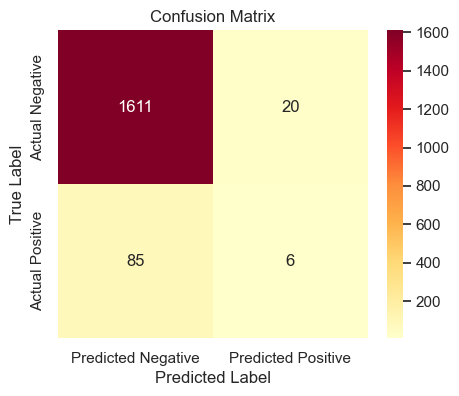

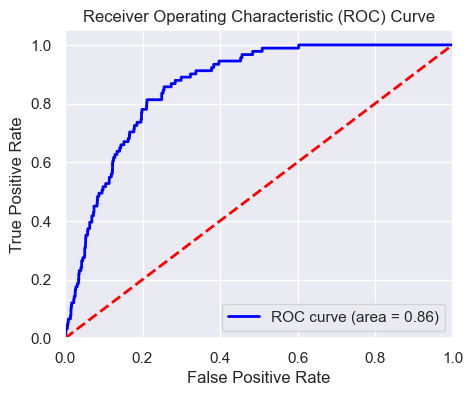

In [86]:
from helper_functions import gridsearch_model_eval

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, enable_categorical=True)

# Define the parameter grid for grid search
xgb_param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 5, 10, 15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 1, 5]
}

# Evaluate and save the XGB Class model
best_model_xgb, preprocessor_xgb, instance_index_xgb = gridsearch_model_eval(xgb_model, xgb_param_grid, 
                                                                             X_train, y_train, 
                                                                             X_test, y_test, 
                                                                             evaluation_results, gridsearch=False)

### <a id='toc5_2_2_'></a> [5.2.2 Random Forest Classifier](#toc0_)

**RF Parameter Grid**:
   - `n_estimators`: Number of trees in the forest.
   - `max_features`: Number of features to consider when looking for the best split.
   - `max_depth`: Maximum depth of the tree.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
   - `class_weight`: Adjust the weights for the classes. The options include:
     - `{0: 1, 1: 1}`: No weighting.
     - `{0: 1, 1: 2}`: Give twice the weight to the positive class.
     - `{0: 1, 1: 5}`: Give five times the weight to the positive class.
     - `'balanced'`: Automatically adjust weights inversely proportional to class frequencies.

Cross-validation ROC_AUC scores: [0.75477877 0.73871306 0.79580501 0.71568514 0.79991491]
Mean CV ROC_AUC score: 0.7609793792882924
ROC_AUC Score: 0.805
Validation Confusion Matrix:
 [[1598   33]
 [  84    7]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1631
           1       0.17      0.08      0.11        91

    accuracy                           0.93      1722
   macro avg       0.56      0.53      0.54      1722
weighted avg       0.91      0.93      0.92      1722



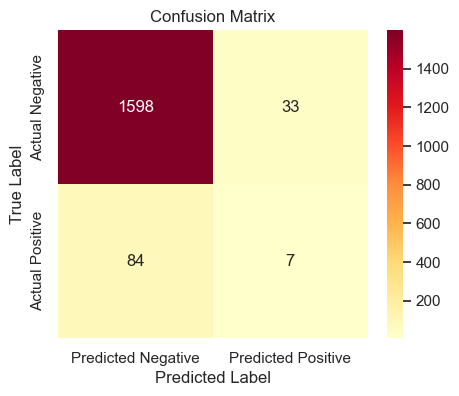

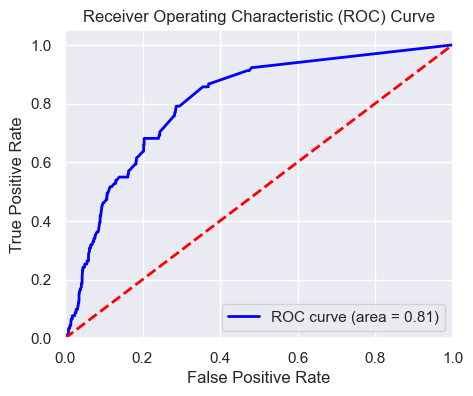

In [87]:
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [400,500,600,700],
    'max_features': [
                    'sqrt',
                    'log2'
                    ],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'] 
}
best_model_rf, preprocessor_rf, instance_index_rf = gridsearch_model_eval(rf_model, rf_param_grid, 
                                                                          X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          evaluation_results, gridsearch=False)

### <a id='toc5_2_3_'></a> [5.2.3 AdaBoost Classifier](#toc0_)

## AdaBoost model

#### Key Hyperparameters of AdaBoost:
- **n_estimators**: Number of boosting rounds. More rounds can lead to better performance but also higher risk of overfitting. The maximum number of estimators at which boosting is terminated. 
- **learning_rate**: Step size shrinkage used in updating weights. Smaller values mean more conservative updates.

AdaBoost does not have a built-in class_weight parameter, but you can handle class weights through the base estimator.

Cross-validation ROC_AUC scores: [0.70398362 0.70432478 0.76744114 0.62661778 0.73143752]
Mean CV ROC_AUC score: 0.7067609678194529
ROC_AUC Score: 0.743
Validation Confusion Matrix:
 [[1578   53]
 [  80   11]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1631
           1       0.17      0.12      0.14        91

    accuracy                           0.92      1722
   macro avg       0.56      0.54      0.55      1722
weighted avg       0.91      0.92      0.92      1722



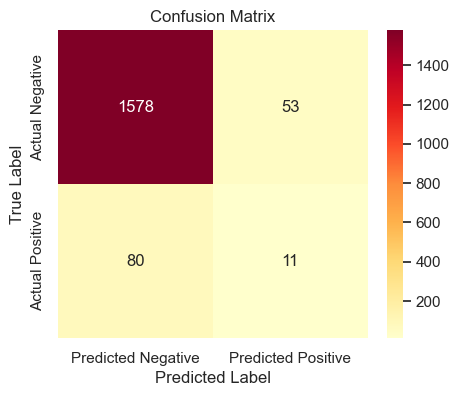

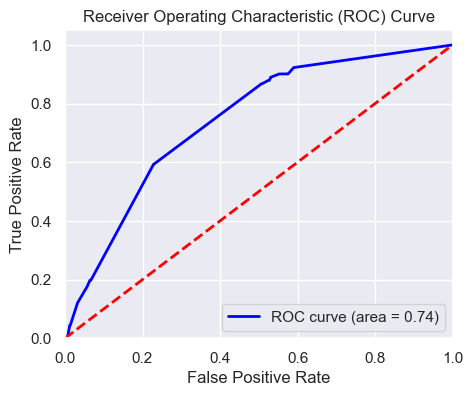

In [88]:
ada_model = AdaBoostClassifier(random_state=42, estimator = DecisionTreeClassifier())
ada_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]  # Tuning the max depth of the base estimator
}
best_model, preprocessor, instance_index_ada = gridsearch_model_eval(ada_model, ada_param_grid, 
                                                                     X_train, y_train, 
                                                                     X_test, y_test, 
                                                                     evaluation_results, gridsearch=False)

### <a id='toc5_2_4_'></a> [5.2.4 CatBoost Classifier](#toc0_)

## CatBoost model:

#### Key Hyperparameters CatBoost:
- **iterations**: The maximum number of trees.
- **learning_rate**: Step size shrinkage/The learning rate.
- **depth**: Depth of the trees. Higher values can lead to more complex models.
- **class_weight**: Class weights

Learning rate set to 0.023485
0:	learn: 0.6615109	total: 140ms	remaining: 2m 19s
2:	learn: 0.5998147	total: 147ms	remaining: 48.8s
4:	learn: 0.5479222	total: 154ms	remaining: 30.7s
6:	learn: 0.5025624	total: 162ms	remaining: 23s
8:	learn: 0.4619837	total: 169ms	remaining: 18.6s
10:	learn: 0.4298127	total: 176ms	remaining: 15.8s
12:	learn: 0.3988107	total: 183ms	remaining: 13.9s
14:	learn: 0.3720338	total: 191ms	remaining: 12.6s
16:	learn: 0.3487161	total: 199ms	remaining: 11.5s
18:	learn: 0.3286186	total: 207ms	remaining: 10.7s
20:	learn: 0.3095149	total: 215ms	remaining: 10s
22:	learn: 0.2936155	total: 222ms	remaining: 9.43s
24:	learn: 0.2798632	total: 230ms	remaining: 8.97s
26:	learn: 0.2687071	total: 237ms	remaining: 8.55s
28:	learn: 0.2576518	total: 245ms	remaining: 8.19s
30:	learn: 0.2480802	total: 252ms	remaining: 7.88s
32:	learn: 0.2396181	total: 260ms	remaining: 7.61s
34:	learn: 0.2323036	total: 267ms	remaining: 7.37s
36:	learn: 0.2266593	total: 275ms	remaining: 7.16s
38:	learn

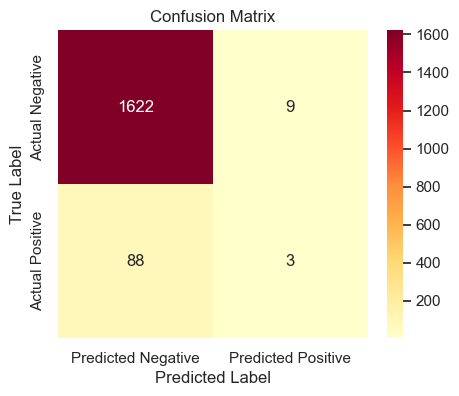

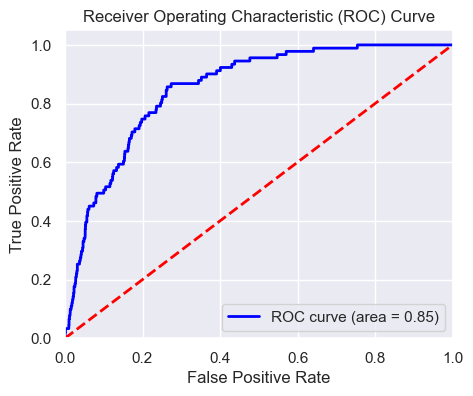

In [89]:
cat_model = CatBoostClassifier(random_state=42,verbose=2)
cat_param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64],
    'scale_pos_weight': [1, 2, 5]
}
best_model_cat, preprocessor_cat, instance_index_cat = gridsearch_model_eval(cat_model, cat_param_grid, 
                                                                             X_train, y_train, 
                                                                             X_test, y_test, 
                                                                             evaluation_results, gridsearch=False)

### <a id='toc5_2_5_'></a> [5.2.5 XGBoost Classifier - with hyperparameter tuning](#toc0_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 1.0}
Best Score: 0.846
ROC_AUC Score: 0.862
Validation Confusion Matrix:
 [[1624    7]
 [  88    3]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1631
           1       0.30      0.03      0.06        91

    accuracy                           0.94      1722
   macro avg       0.62      0.51      0.52      1722
weighted avg       0.91      0.94      0.92      1722



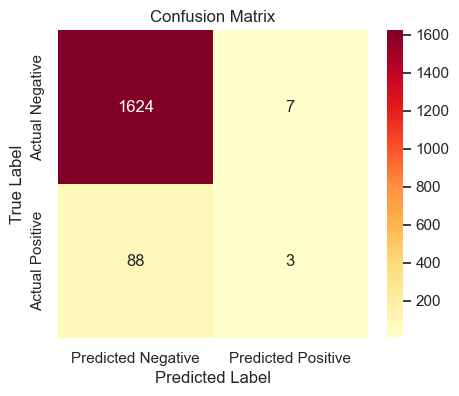

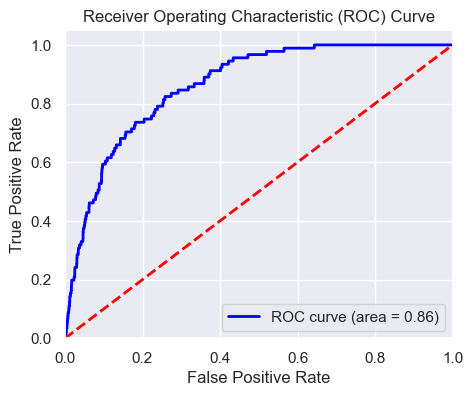

In [90]:
# Define the XGBoost model
xgb_model_hyper = XGBClassifier(random_state=42, enable_categorical=True)

# Define the parameter grid for grid search
xgb_param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 5, 10, 15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Evaluate and save the XGB Class model
best_model_xgb_hyper, preprocessor_xgb_hyper, instance_index_xgb_hyper = gridsearch_model_eval(xgb_model, xgb_param_grid, 
                                                                                               X_train, y_train, 
                                                                                               X_test, y_test, 
                                                                                               evaluation_results, gridsearch=True)

In [91]:
# Calculate SHAP values
fitted_preprocessor_xgb_hyper = best_model_xgb_hyper.named_steps['preprocessor']
X_train_preprocessed = fitted_preprocessor_xgb_hyper.transform(X_train)
explainer_xgb_hyper = shap.TreeExplainer(best_model_xgb_hyper.named_steps['classifier'])
shap_values_xgb_hyper = explainer_xgb_hyper.shap_values(X_train_preprocessed)
    
# Store SHAP values in a DataFrame
shap_df_xgb_hyper = pd.DataFrame(shap_values_xgb_hyper, columns=fitted_preprocessor_xgb_hyper.get_feature_names_out())

## <a id='toc5_3_'></a> [5.3 Model Evaluation and Findings](#toc0_)

Based on the evaluation of various models for predicting the presence of the West Nile virus, we conclude the following:

### Model Performance Overview

| Model                                   | ROC-AUC | CV ROC-AUC |
|-----------------------------------------|:-------:|:----------:|
| XGBoost <br>(w/ hyperparameter tuning)  |   0.86  |    0.85    |
| XGBoost                                 |   0.86  |    0.82    |
| CatBoost                        |   0.85  |    0.84  |
| RandomForest (baseline)                                |   0.78  |    0.77   |
| AdaBoost                           |   0.71  |    0.67    |

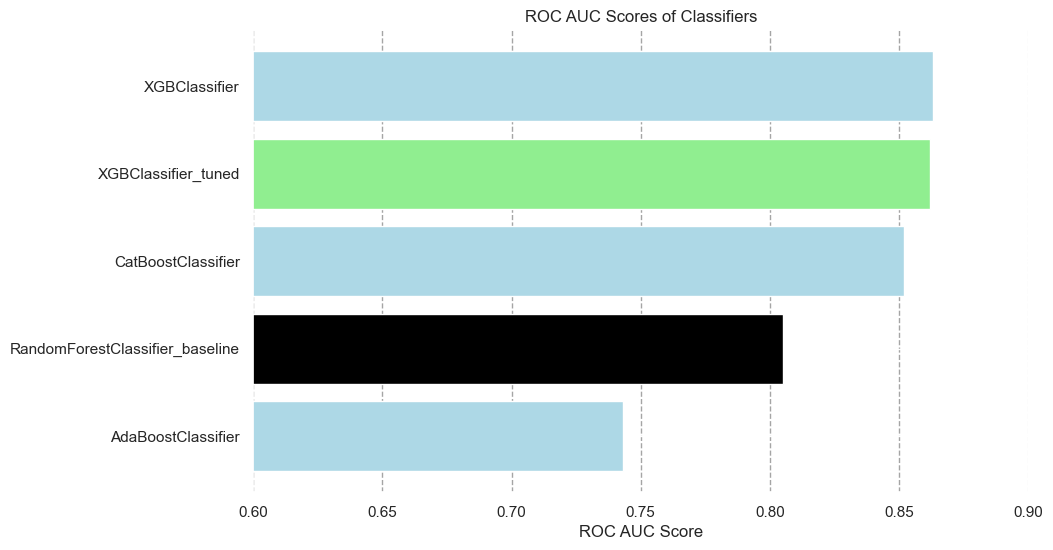

In [92]:
from helper_functions import plot_roc_auc_scores

plot_roc_auc_scores(evaluation_results)

XGBoost was found to be the highest performing model (though marginally). Hyperparameter tuning did not increase the ROC-AUC, but helped to improve the mean CV ROC-AUC only, giving it more consistency its predictions.<br>
RandomForest, which was chosen as our baseline model, out-performed AdaBoost significantly.<br>

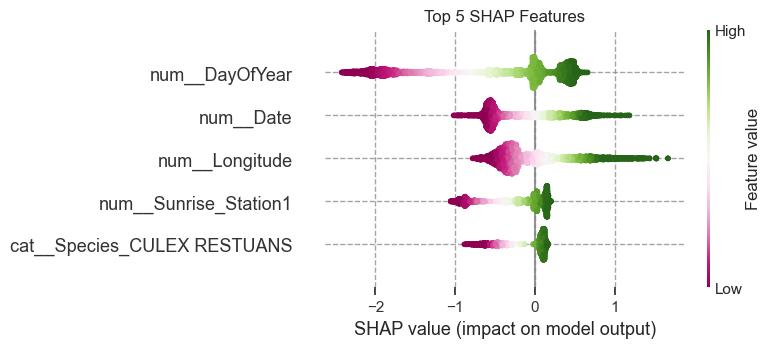

In [93]:
from helper_functions import plot_top_shap_features

plot_top_shap_features(shap_df_xgb_hyper, top_n=5)

Extracted and plotted the top 5 SHAP values (in order of magnitude of the absolute mean SHAP values) as a form of validation, to ensure that the model was looking at features intuitively to make a prediction.<br>


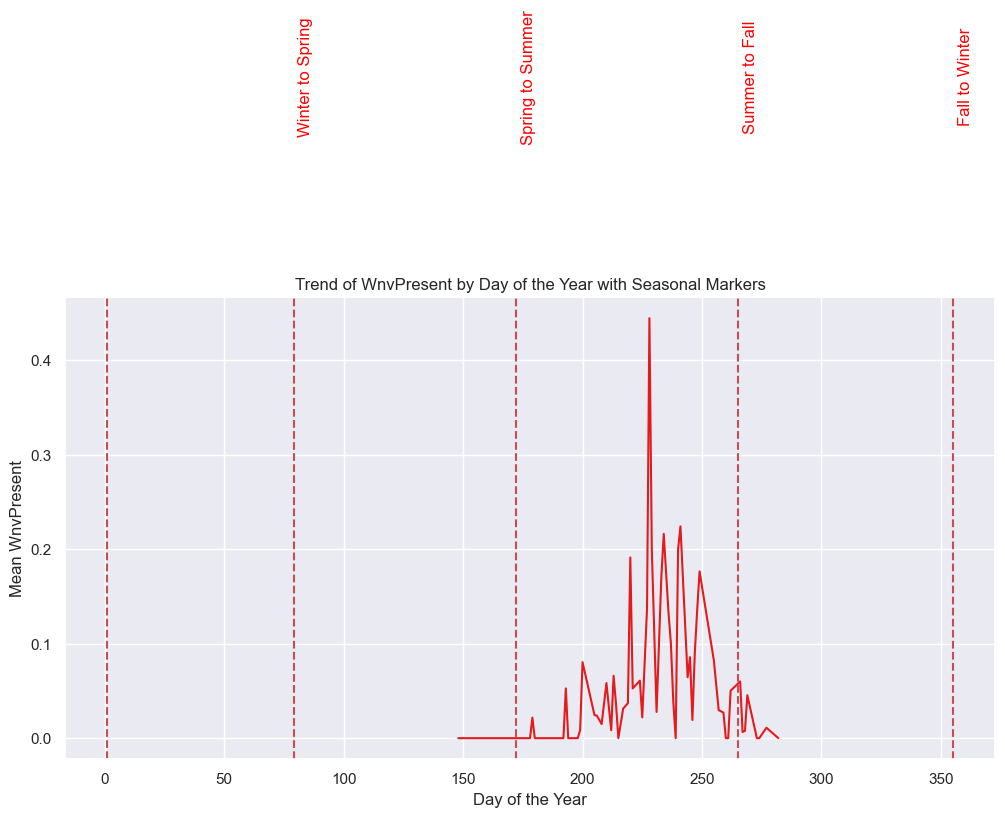

In [94]:
day_of_year_trend_corrected = df_train_grouped.groupby('DayOfYear')['WnvPresent'].mean()

plt.figure(figsize=(12, 6))
plt.plot(day_of_year_trend_corrected.index, day_of_year_trend_corrected.values, label='WnvPresent Mean')

# Adding vertical lines to mark the beginning of each season
season_markers = [79, 172, 265, 355, 1]
season_labels = ['Winter to Spring', 'Spring to Summer', 'Summer to Fall', 'Fall to Winter', 'Winter']

for i, day in enumerate(season_markers):
    plt.axvline(x=day, color='r', linestyle='--')
    if i < len(season_labels) - 1:
        plt.text(day + 2, 0.7, season_labels[i], rotation=90, verticalalignment='center', color='red')

# Adding labels and title
plt.title('Trend of WnvPresent by Day of the Year with Seasonal Markers')
plt.xlabel('Day of the Year')
plt.ylabel('Mean WnvPresent')
plt.grid(True)
plt.show()

The graph above shows the trend of Wnv during the seasons. Wnv tends to peak around day 225 (Summer) and this is also supported by our earlier EDA sections, where it shows highest WnvPresent cases in Summer. <br>
We can therefore conclude that the model is using the day features to make predictions in a logical manner.

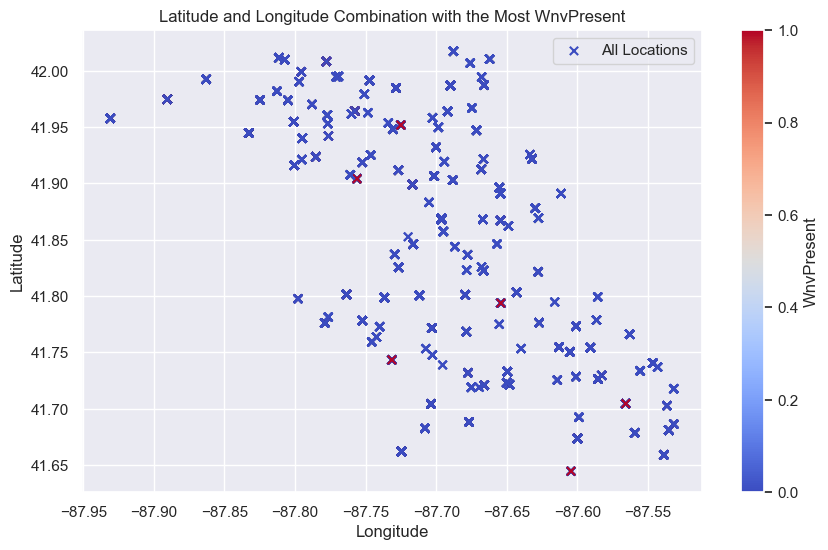

In [95]:
# Find the latitude and longitude combination with the most WnvPresent
wnv_present_locations = df_train_grouped[df_train_grouped['WnvPresent'] == 1]
most_common_location = wnv_present_locations.groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')
most_common_location = most_common_location.sort_values(by='counts', ascending=False).head(1)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_train_grouped['Longitude'], df_train_grouped['Latitude'], c=df_train_grouped['WnvPresent'], cmap='coolwarm', marker='x', label='All Locations', alpha=1)
plt.colorbar(scatter, label='WnvPresent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Combination with the Most WnvPresent')
plt.legend()
plt.show()

The graph above shows the distribution of the WnvPresent cases based on latitude & longitude. We can observe that most of the WnvPresent cases tend to occur in the right side of the grid (beyond longitude -87.75).<br>
We can therefore conclude that the model is using the latitude feature in a logical manner, since having higher latitudes increases the probability of the model predicting the positive class.<br>

For the remaining features Sunrise & Species:<br><br>
**Sunrise**: Earlier sunrise has a slightly negative impact on the probability of the model predicting the positive class. This corresponds with our EDA findings on the activity cycle of the mosquitos (they are most active at night). Having an earlier sunrise would mean that the window period for fulfilling their role as the disease vector is smaller, hence leading to a lower probability of a positive prediction. So in this regard, the model is making use of this feature intuitively as well. <br>
<br>
**Species - Culex Restuans**: Unsurprisingly, an absence of the disease vector has a negative impact on the probability of the model predicting the positive class. However, what is surprising is that the presence of it, does not have a strong positive impact on the model. This suggests the possibility that there could be other factors in play which are affecting the results. Some possibilities include:<br>
a. Low rate of WnvPresent. Even though the Restuans species is a vector for Wnv, the positive rate is actually quite low (311 positive out of 89699 samples).<br>
b. Other external factors interacting with the feature - like weather conditions, location, could have impacted the consistency at which the presence of the vector contributes to a positive prediction.

## <a id='toc6_'></a> [6.0 Conclusion](#toc0_)

Among the models evaluated, the **optimized XGBClassifier** achieved the highest overall performance with a mean cross-validation ROC-AUC score of 0.85. These results indicate that the model can discrimate between the positive and negative classes.<br>

The **CatBoostClassifier** also demonstrated strong performance with mean cross-validation ROC-AUC scores of 0.84. These models are viable alternatives if further model diversity or ensemble approaches are considered.<br>

**AdaBoostClassifier** performed well below the baseline and was found unsuitable to be used for our current dataset.<br>

Overall, the **optimized XGBClassifier** is recommended for deployment due to its superior performance metrics. Future work could involve further hyperparameter tuning, feature engineering, and testing the model on real-world data to ensure robustness and generalizability.

## <a id='toc7_'></a> [7.0 Kaggle Score](#toc0_)

Choose the model to load from the model folder.<br>
Example `'model/best_xgb_model.pkl'`

In [96]:
# Define the model paths and names
models = {
    'XGBClassifier_tuned': r'model\XGBClassifier_tuned.pkl',
    'XGBClassifier_baseline': r'model\XGBClassifier_baseline.pkl',
    'AdaBoostClassifier_baseline': r'model\AdaBoostClassifier_baseline.pkl',
    'CatBoostClassifier_baseline': r'model\CatBoostClassifier_baseline.pkl',
    'RandomForestClassifier_baseline': r'model\RandomForestClassifier_baseline.pkl'}

# Iterate through the models
for model_name, model_path in models.items():
    sample_submission = pd.read_csv(r'datasets\input\sampleSubmission.csv')
    model_loaded = joblib.load(model_path)
    test_pred = model_loaded.predict_proba(df_test_comb)[:, 1]
    sample_submission['WnvPresent'] = test_pred
    sample_submission['WnvPresent'] = sample_submission['WnvPresent'].apply(lambda x: '{:.6f}'.format(x))
    submission_path = rf'output\{model_name}_submission.csv'
    sample_submission.to_csv(submission_path, index=False)
    print(f"Predictions for {model_name} saved to {submission_path}")
    print(sample_submission.head())

Predictions for XGBClassifier_tuned saved to output\XGBClassifier_tuned_submission.csv
   Id WnvPresent
0   1   0.003187
1   2   0.002577
2   3   0.002943
3   4   0.002880
4   5   0.002635
Predictions for XGBClassifier_baseline saved to output\XGBClassifier_baseline_submission.csv
   Id WnvPresent
0   1   0.000736
1   2   0.000134
2   3   0.000406
3   4   0.000230
4   5   0.000241
Predictions for AdaBoostClassifier_baseline saved to output\AdaBoostClassifier_baseline_submission.csv
   Id WnvPresent
0   1   0.000000
1   2   0.000000
2   3   0.000000
3   4   0.000000
4   5   0.000000
Predictions for CatBoostClassifier_baseline saved to output\CatBoostClassifier_baseline_submission.csv
   Id WnvPresent
0   1   0.005678
1   2   0.002839
2   3   0.004748
3   4   0.002783
4   5   0.002842
Predictions for RandomForestClassifier_baseline saved to output\RandomForestClassifier_baseline_submission.csv
   Id WnvPresent
0   1   0.040000
1   2   0.010000
2   3   0.010000
3   4   0.010000
4   5   0.

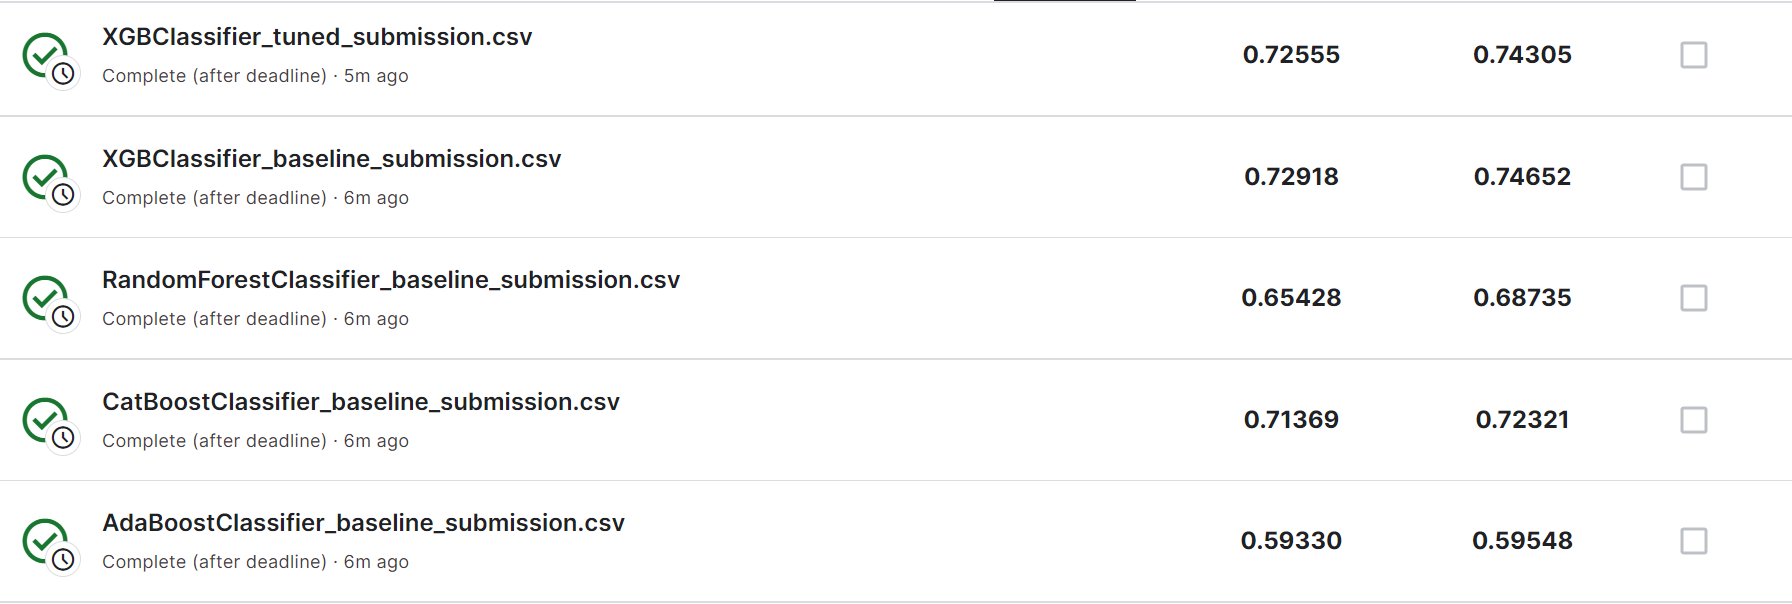